## Forecasting GDP with Linear and Non-Linear Methods

GDP forecasts are a cornerstone of many models in both the financial and economic spheres. These forecasts can profoundly influence the decisions of asset managers, economists, corporate finance teams, and policymakers.

### Importance of GDP Forecasts in Finance and Economics

GDP and its forecasts can be directly or indirectly incorporated into numerous key components of the investment and financial industry:

1. **Discounted Cash Flow (DCF) Models**
    - **Revenue/Cash Flow Growth**: GDP forecasts can be used as a direct growth rate for revenue or cash flows, serving as a baseline before applying adjustments in the earlier periods.
    - **Perpetuity Growth Rate**: GDP can provide a basis for the long-term growth rate of cash flows in perpetuity.
    - **Discount Rate Estimates**: GDP forecasts indirectly influence the discount rate by affecting the risk-free rate, equity risk premium, inflation/interest rate expectations, and credit spreads.

2. **Equity Valuation Models**
    - **Gordon Growth Model**: This model estimates the long-term growth rate of earnings or dividends, often assuming a constant growth rate influenced by GDP forecasts.
    - **Multiple Valuation Models**: Models like the P/E ratio may incorporate earnings estimates, which can be influenced by expected GDP growth, to evaluate potential future valuation multiples.
    - **Asset-Based Valuations**: Methods like the excess earnings model consider future expected earnings, which are linked to GDP growth, to determine the value of a company’s assets beyond their book value.

3. **Asset Pricing Models**
    - **Capital Asset Pricing Model (CAPM)**: GDP forecasts impact the risk-free rate and market risk premium estimates, which are essential components of CAPM.
    - **Multi-Factor Models**: These models may incorporate GDP growth as a factor influencing asset prices and returns.

4. **Portfolio Optimization & Allocations**
    - **Mean–Variance Optimization (MVO) & Reverse MVO**: GDP forecasts impact expected returns, variances, and the risk-free rate, which are crucial inputs in these models.
    - **Black-Litterman Optimization**: GDP influences adjustments made to implied returns within this optimization framework.
    - **Other Allocation Techniques**: Various portfolio allocation strategies may incorporate GDP forecasts in their decision-making processes.

5. **Yield Curves**
   - **Shape of the Yield Curve**: GDP growth expectations influence the shape of the yield curve; high growth expectations typically lead to a steep curve, while low growth expectations may result in an inverted curve.

6. **Option Pricing**
   - **Implied Volatility and Components**: Option pricing models, including implied volatility, are influenced by overall economic conditions, including GDP performance.

7. **Stress Testing**
   - **Financial Asset Performance**: GDP forecasts are critical in stress testing, helping to assess how a bank's financial assets will perform under different economic scenarios.

### Methods for Improving GDP Forecasts

Given the significant impact of GDP forecasts on various aspects of the financial and economic industries, exploring and evaluating methods is very relevant. The following article includes overviews into the applications of the following methods on GDP figures and their given results:

- **ARIMA (AutoRegressive Integrated Moving Average)**: A time-series forecasting technique that can capture different aspects of GDP trends and cycles.
- **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**: A model used for estimating the volatility of GDP growth rates, which can improve forecast accuracy by accounting for changing variances over time.
- **ETS (Exponential Smoothing State Space Model)**: A method that combines error, trend, and seasonality to provide robust GDP forecasts.
- **LSTM (Long Short-Term Memory Networks)**: A type of recurrent neural network (RNN) well-suited for capturing long-term dependencies in GDP time series data, potentially improving forecast accuracy.
- **Transformations**: Various data transformations (e.g., logarithmic, differencing) can be applied to GDP data to stabilize variance and make the series more amenable to modeling and forecasting.

### Author
**Alexander Richt**

*Strategic Data Leader and Analyst*

*I am dedicated to continuous professional development and thrive in roles that merge technical expertise with strategic oversight. I am committed to leveraging innovation in programming, modeling, and analytics to drive tangible results in the corporate, investment and finance sectors.*

**Credentials:** CFA Charterholder, MSc in Economics and Finance, and a Master's Certificate in Econometrics and Data Science

[alexander.richt1@gmail.com](mailto:alexander.richt1@gmail.com)  
[LinkedIn Profile](https://www.linkedin.com/in/alexander-richt/)  
[GitHub](https://github.com/AlexanderRicht/FredBrain)

In [1]:
# Alexander Richt
import os
import pandas as pd
from dotenv import load_dotenv
import mysql.connector
import numpy as np
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch, normal_ad
from statsmodels.stats.stattools import jarque_bera, durbin_watson
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from tabulate import tabulate
from statsmodels.stats.diagnostic import breaks_cusumolsresid


load_dotenv()
print("Current working directory:", os.getcwd())

# Now access the variables using os.getenv
DATABASE_HOST = os.getenv('DATABASE_HOST')
DATABASE_USERNAME = os.getenv('DATABASE_USERNAME')
DATABASE_PASSWORD = os.getenv('DATABASE_PASSWORD')
DATABASE_NAME = os.getenv('DATABASE_NAME')

try:
    print("Connecting to the database...")
    db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
    cursor = db_manager.cursor()
except mysql.connector.Error as e:
    print("Error while connecting to MySQL", e)

Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series = 'GDPC1';"

db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
cursor = db_manager.cursor()

cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['First Release Upload Datetime', 'Latest Release Upload Datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

Current working directory: C:\Users\alexa\PycharmProjects\FredBrain\FredBrain\FredBrain
Connecting to the database...


# Real GDP Over Time

Below we can see the plot of GDP in the United States over time. There are occosional dips caused by economic shocks such as
- Covid Pandemic
- 2008 recession

But overall, the trend is a clear upward drift without any specific seasonality

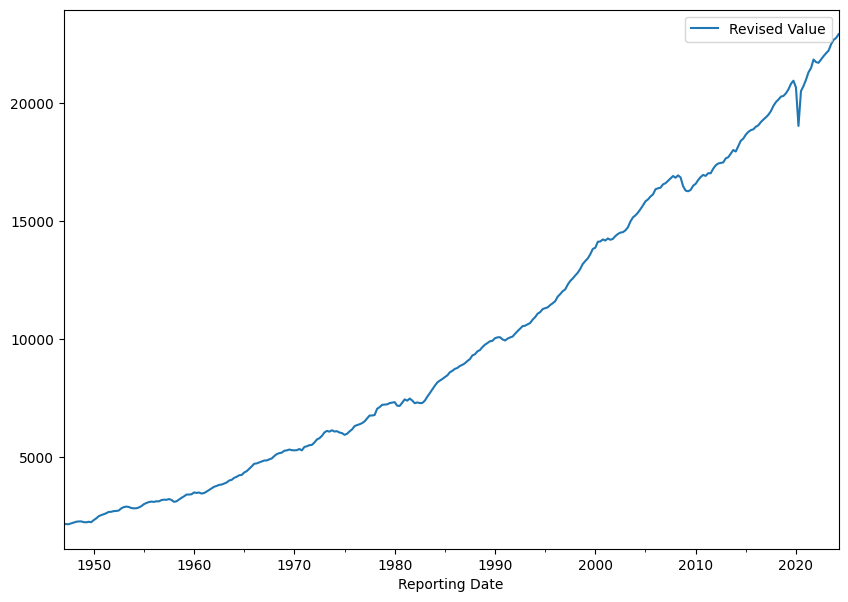

In [2]:
GDP_Forecast = Indicator_Dataframe[['Reporting Date', 'Revised Value']].copy()
GDP_Forecast['Reporting Date'] = pd.to_datetime(GDP_Forecast['Reporting Date'], format = '%Y/%m/%d')
GDP_Forecast.set_index('Reporting Date', inplace = True)
GDP_Forecast.sort_index(inplace = True)


fig, ax = plt.subplots(figsize=(10, 7))
GDP_Forecast.plot(ax=ax, label = "GDP")
gdp_path = "GDP_Over_Time.png"
plt.savefig(gdp_path)
plt.show()

# ARIMA Regression Model Assumptions:

Before we begin modeling GDP and attempting to forecast future GDP movements, it is relevant to review the respective assumptions and model validity tests that must be followed when constructing ARIMA models:

1. Stationarity
    - The time series data should be stationary, meaning its statistical properties (mean, variance, autocorrelation) should be constant over time and are weakly dependent
    - The covariance and autocovariance of the variable are constant through time and the (auto)correlation goes to zero sufficently fast over time
    - Can be tested through the Dickey-Fuller Test or achieved by differencing the series if necessary
      
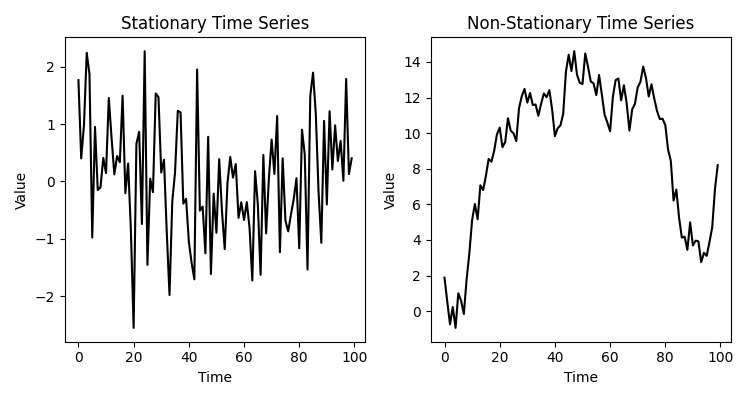

2. The residuals (error terms) are homeoskedastic
    - The residuals have constant or similar variance
    - Can be tested with a Breusch-Pagan heteroskedasticity test
    - Homoskedasticity is crucial for the validity of hypothesis tests in regression analysis

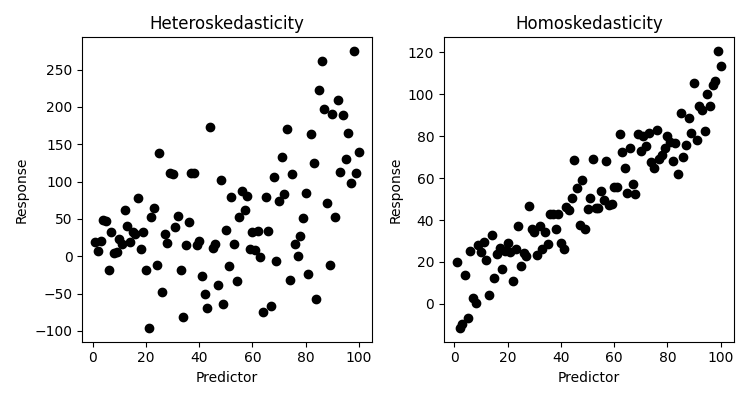

3. The residuals (error term) must(should) be normally distributed*
    -  Mean, median and mode are (near) equal and a majority of data falls within one standard deviation from the mean
    -  Can be tested via the Jarque-Bera test which measures the skewness and kurtosis of residuals
    -  Normality is especially crucial for small sample sizes and hypothesis testing involving residuals. While not strictly required, it is desirable for certain statistical tests
  
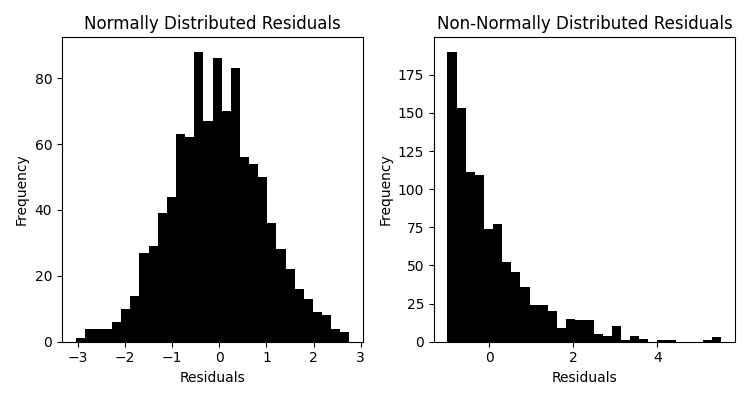

4. The residuals (error term) are independently distributed (no autocorrelation)
    - The residuals of the time series model should be independently distributed and contain no significant autocorrelation
    - Can be tested through the Ljung-Box test & Durbin Watson Test
    - The residuals of the time series model should be independently distributed and contain no significant autocorrelation. Presence of autocorrelation suggests that the model has not fully captured the underlying data structure

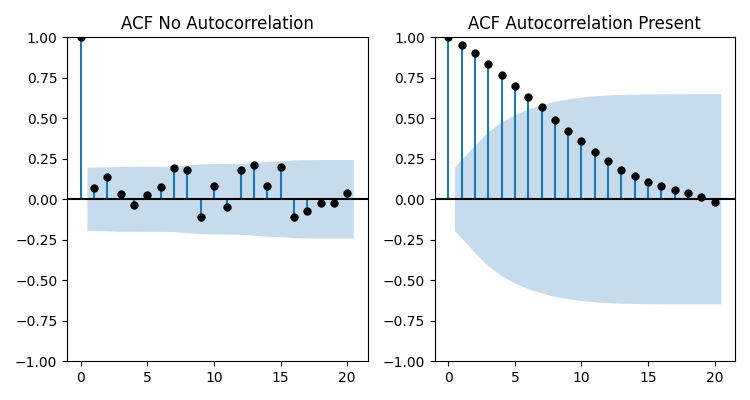

5. The residuals (error terms) have a conditional mean of zero
    - Regardless of which value we choose for X, the residual (error term) must not display any systematic pattern and have a mean of 0
    - Can be checked by plotting the residuals order indirectly with the Durbin Watson test; conditional mean of zero defnition -> on average they're still near zero but may conditionally have means some distance from zero but the overall mean is near zero
    - If this assumption is violated, it might indicate that the model is misspecified, requiring a reconsideration of the model’s form, such as adding non-linear terms

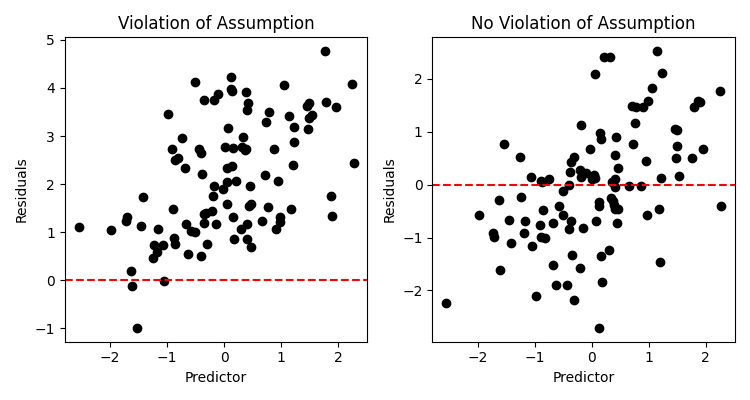

6. Linearity should exist in the fitted parameters

    -  The relationship between the dependent and independent variables should be linear
    -  Can be checked using the Wald Test
    -  If the assumption is broken, it would suggest that the relationship is not just linear, implying that non-linear terms or interactions may be necessary
  
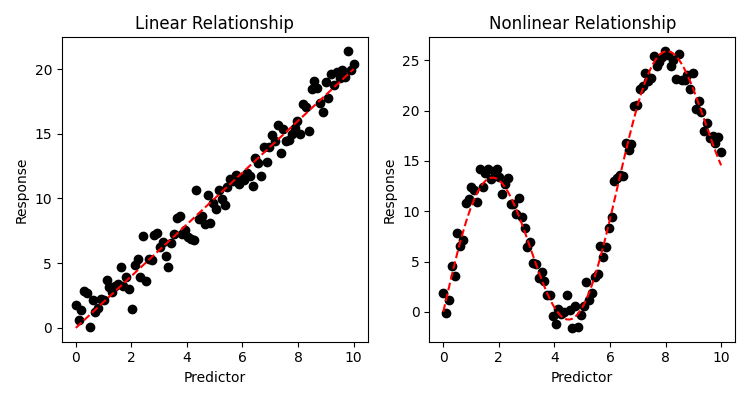
  
7. Parameter Stability
       
    - The parameters of the ARIMA model should be stable over time
    - This can be examined usin the CUSUM test (Cumulative Sum Control Chart) to detect changes in the parameters over time.
    - If parameter instability is detected, the underlying process changes over time (due to structural breaks, policy changes, etc.) making the model’s parameters unstable, leading to poor forecasting performance

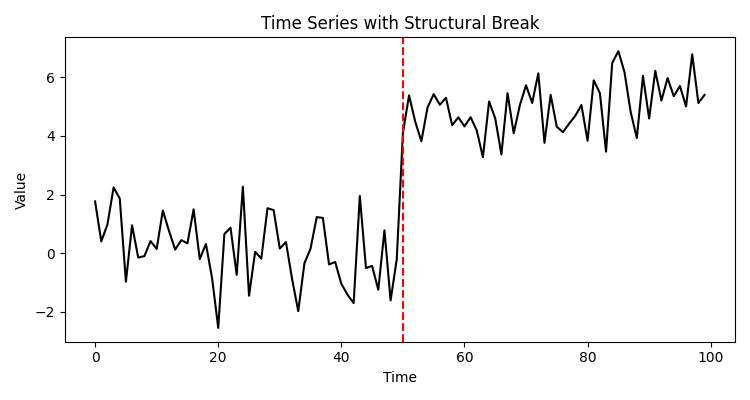

8. No Multicollinearity
    - In the context of time series regressions with multiple predictors (e.g., ARIMAX models), no perfect correlations should exist between the given variables
    - Can be tested with the Variance Inflation Factor (VIF) and correlation matrix

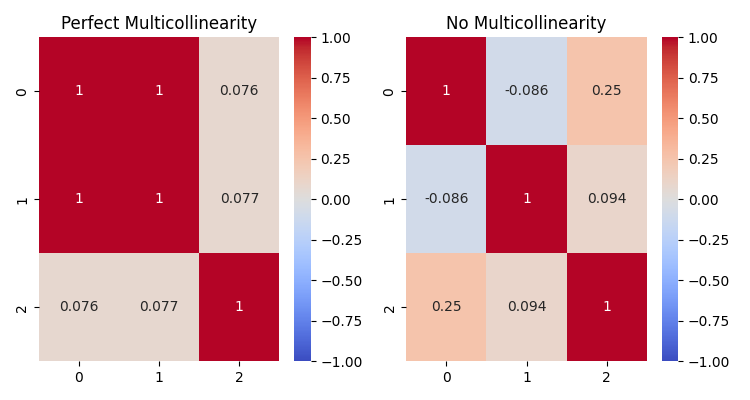

ADF Test Statistic: 3.520648
p-value: 1.000000
Number of obervations: 308


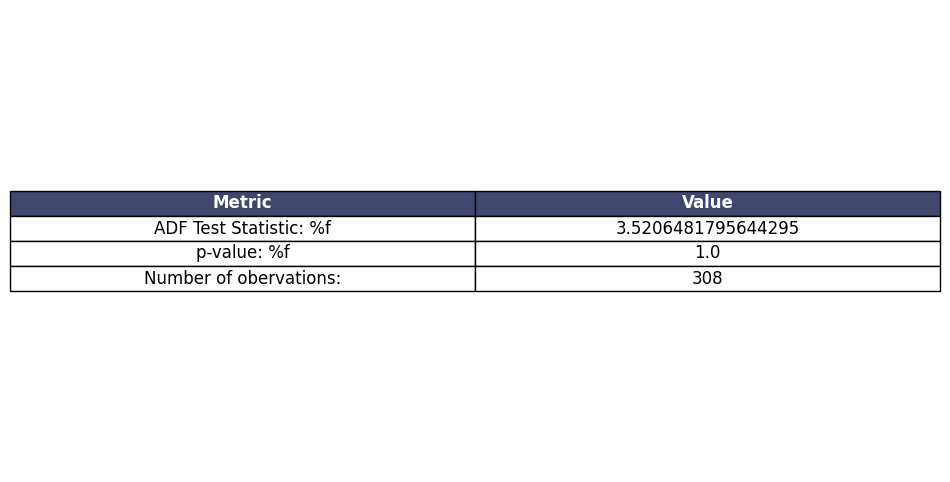

In [4]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(GDP_Forecast['Revised Value'])
# Output the results
print('ADF Test Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Number of obervations:', adf_test[3])

data = [
    ["Metric", "Value"],
    ["ADF Test Statistic: %f", adf_test[0]],
    ["p-value: %f", adf_test[1]],
    ["Number of obervations:", adf_test[3]],
]

title = f"Dickey Fuller Test"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

table = ax.table(cellText=data, colLabels=None, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5) 

table[0, 0].set_facecolor("#40466e")
table[0, 1].set_facecolor("#40466e")
table[0, 0].set_text_props(color="w", weight="bold")
table[0, 1].set_text_props(color="w", weight="bold")

modeltable_path = "adf_table_output.png"
plt.savefig(modeltable_path, bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

ADF Reveals a Unit Root and Non-Stationarity as presented by the fact that the Test Statistic is strongly positive at 3.46 and the p-value is at 1. This supports the null hypothesis of the ADF test that the data is non-stationary and contains a unit root. 
- Non-stationarity can lead to unreliable paramter estimates and breaks the assumption of regression models that data is stationary
- A unit root also implies the prescense of stochastic trends. Which unlike determistic trends, are not predicable and are driven by random shocks over time contributing to random walk type behavior

In [50]:
GDP_Forecast.index = pd.period_range(start=GDP_Forecast.index[0], periods=len(GDP_Forecast), freq='Q').to_timestamp()

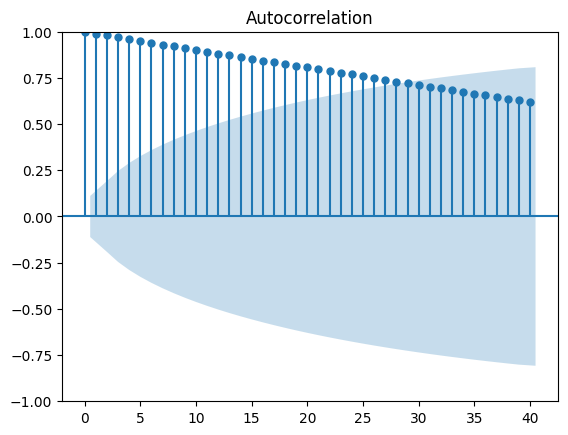

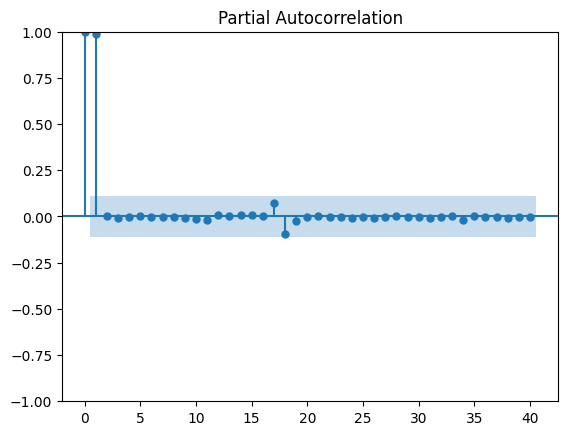

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(GDP_Forecast['Revised Value'], lags=40)
acfplot_path = "acf_plot_output.png"
plt.savefig(acfplot_path)  # Save the ACF plot to a file
plt.show()  # Show the ACF plot

# Generate the PACF plot
plot_pacf(GDP_Forecast['Revised Value'], lags=40)
pacfplot_path = "pacf_plot_output.png"
plt.savefig(pacfplot_path)  # Save the PACF plot to a file
plt.show()  # Show the PACF plot

# ACF & PACF Intepretentation
- ACF: We clearly see geometric decay in the ACF plot and that it is significant until p lags. 
- PACF: We see that it is significant until p lags but see no geometric decay
- Seasonality: Neither plots exhibit seasonality at any m lag
- Differencing: We require differencing as shown by the ADF test

The above suggests a non-seasonal ARIMA(1,1,0) model:
- p=1: Indicates the AR component from the PACF plot
- d=1: Indicates the differencing needed to make the series stationary
- q=0: Indicates the absence of significant MA components (as the ACF plot shows no significant spikes after lag 1)

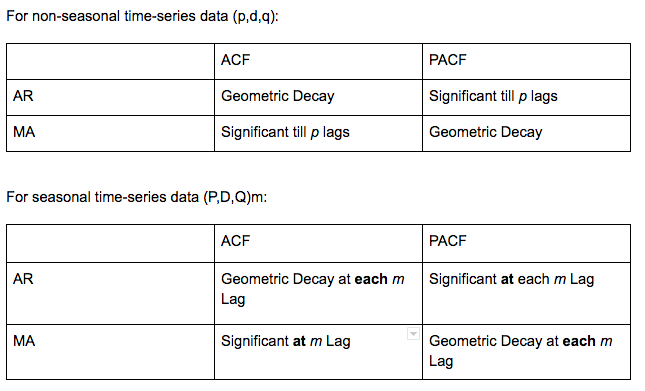

# Math Review

## What is an ARIMA Model?

An ARIMA (AutoRegressive Integrated Moving Average) model is often used in time series forecasting by combining three key components: AR (AutoRegressive), I (Integrated), and MA (Moving Average) and a potential fourth component, S (Seasonal).

- The **AR** (AutoRegressive) part models the current value of the series as a linear function of its previous values (lags).
- The **I** (Integrated) part involves differencing the series to make it stationary, which is essential for proper parameter inference.
- The **MA** (Moving Average) part models the current value as a linear function of past forecast errors to provide a way to better account for random shocks or irregularities in the time series data.
- A **Seasonal** component can be included to address recurring patterns or cycles in the data at regular intervals such as yearly, quarterly, monthly, etc. When seasonality is present in the data, the ARIMA model can be extended to a **Seasonal ARIMA** (SARIMA) model. When defined in the function, it can incorporate seasonal autoregressive (SAR) and seasonal moving average (SMA) components, along with seasonal differencing/integration (SI) to capture periodic fluctuations.

Together, these components help ARIMA and SARIMA models capture a wide range of time series behaviors and trends, making them highly versatile for forecasting and analysis.

### ARIMA Model Equation

$$ y_t = c + \epsilon_t + \phi_1 y_{t-1}^{(d)} + \phi_2 y_{t-2}^{(d)} + \ldots + \phi_p y_{t-p}^{(d)} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \ldots + \theta_q \epsilon_{t-q} 
$$

Where:
- $y_t$ is the differenced time series data.
- $c$ is a constant term.
- $\epsilon_t$ is the white noise error term.
- $\phi$ (phi) coefficients represent the auto-regressive part.
- $\theta$ (theta) coefficients represent the moving average part.
- $d$ is the differencing order.

### AR(1) Model and OLS Estimator

In an AR(1) model:

The model equation is:

$$
y_t = \phi_1 y_{t-1} + \varepsilon_t
$$

where $\varepsilon_t$ is a white noise error term with mean zero and constant variance.

#### Formula for $\hat{\phi}_1$

The OLS estimator for $\phi_1$ is given by:

$$
\hat{\phi}_1 = \frac{\sum_{t=2}^T (y_{t-1} - \bar{y}_{\text{lag}}) (y_t - \bar{y})}{\sum_{t=2}^T (y_{t-1} - \bar{y}_{\text{lag}})^2} =
\frac{\text{Cov}(y_{t-1}, y_t)}{\text{Var}(y_{t-1})}
$$

where:

- $\bar{y}$ is the mean of the series $\{ y_2, y_3, \ldots, y_T \}$:

$$
\bar{y} = \frac{1}{T-1} \sum_{t=2}^T y_t
$$

- $\bar{y}_{\text{lag}}$ is the mean of the lagged series $\{ y_1, y_2, \ldots, y_{T-1} \}$:

$$
\bar{y}_{\text{lag}} = \frac{1}{T-1} \sum_{t=1}^{T-1} y_t
$$

#### Example of AR(1) Model

Let’s consider a time series with the following values:

$$
\{ y_1, y_2, y_3, y_4, y_5 \} = \{ 2, 3, 5, 7, 8 \}
$$

We want to estimate $\phi_1$ for this AR(1) model.

##### Steps to Calculate $\hat{\phi}_1$

1. **Calculate the Mean of the Series:**

In the AR(1) model, we compute the mean $\bar{y}$ only from the subset of data from $t=2$ to $T$. This is because the AR(1) model uses only those values for which we have corresponding lagged values.

$$
\bar{y} = \frac{1}{T-1} \sum_{t=2}^T y_t
$$

For our example:

$$
\bar{y} = \frac{1}{5-1} \sum_{t=2}^5 y_t = \frac{1}{4} (3 + 5 + 7 + 8) = \frac{23}{4} = 5.75
$$

**Explanation:**

- We exclude $y_1$ because it does not have a preceding lagged value ($y_0$) to pair with, making it unsuitable for estimating $\phi_1$.

2. **Calculate the Mean of the Lagged Series:**

Similarly, $\bar{y}_{\text{lag}}$ is computed from the lagged values starting from $t=1$ to $T-1$:

$$
\bar{y}_{\text{lag}} = \frac{1}{T-1} \sum_{t=1}^{T-1} y_t
$$

For our example:

$$
\bar{y}_{\text{lag}} = \frac{1}{5-1} \sum_{t=1}^4 y_t = \frac{1}{4} (2 + 3 + 5 + 7) = \frac{17}{4} = 4.25
$$

**Explanation:**

- $\bar{y}_{\text{lag}}$ includes all values from $y_1$ to $y_4$, as these are the lagged values corresponding to $y_2$ to $y_5$.

3. **Compute the Numerator:**

$$
\text{Numerator} = \sum_{t=2}^T (y_{t-1} - \bar{y}_{\text{lag}}) (y_t - \bar{y})
$$

For our example:

$$
\begin{aligned}
\text{Numerator} &= (y_1 - \bar{y}_{\text{lag}}) (y_2 - \bar{y}) + (y_2 - \bar{y}_{\text{lag}}) (y_3 - \bar{y}) \\
&\quad + (y_3 - \bar{y}_{\text{lag}}) (y_4 - \bar{y}) + (y_4 - \bar{y}_{\text{lag}}) (y_5 - \bar{y}) \\
&= (2 - 4.25)(3 - 5.75) + (3 - 4.25)(5 - 5.75) \\
&\quad + (5 - 4.25)(7 - 5.75) + (7 - 4.25)(8 - 5.75) \\
&= (-2.25)(-2.75) + (-1.25)(-0.75) \\
&\quad + (0.75)(1.25) + (2.75)(2.25) \\
&= 6.1875 + 0.9375 + 0.9375 + 6.1875 \\
&= 14.25
\end{aligned}
$$

4. **Compute the Denominator:**

$$
\text{Denominator} = \sum_{t=2}^T (y_{t-1} - \bar{y}_{\text{lag}})^2
$$

For our example:

$$
\begin{aligned}
\text{Denominator} &= (y_1 - \bar{y}_{\text{lag}})^2 + (y_2 - \bar{y}_{\text{lag}})^2 \\
&\quad + (y_3 - \bar{y}_{\text{lag}})^2 + (y_4 - \bar{y}_{\text{lag}})^2 \\
&= (2 - 4.25)^2 + (3 - 4.25)^2 \\
&\quad + (5 - 4.25)^2 + (7 - 4.25)^2 \\
&= (-2.25)^2 + (-1.25)^2 \\
&\quad + (0.75)^2 + (2.75)^2 \\
&= 5.0625 + 1.5625 + 0.5625 + 7.5625 \\
&= 14.75
\end{aligned}
$$

5. **Calculate $\hat{\phi}_1$:**

$$
\hat{\phi}_1 = \frac{\text{Numerator}}{\text{Denominator}}
$$

For our example:

$$
\hat{\phi}_1 = \frac{14.25}{14.75} \approx 0.967
$$

### Summary

The formula for $\hat{\phi}_1$ involves computing the sample covariance between $y_t$ and $y_{t-1}$ and dividing it by the sample variance of $y_{t-1}$. This estimator provides the value of $\phi_1$ in an AR(1) model based on sample data.

For the example provided:

- The estimated $\hat{\phi}_1$ is approximately 0.967.



## AR(2) Model and Matrix Representation

An AR(2) model (AutoRegressive model of order 2) predicts the current value of the time series using the two most recent past values. The model equation is:

$$
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \varepsilon_t
$$

where:
- $y_t$ is the value at time $t$.
- $y_{t-1}$ is the value at the previous time period.
- $y_{t-2}$ is the value two time periods ago.
- $\phi_1$ and $\phi_2$ are parameters.
- $\varepsilon_t$ is the white noise error term.

The following structure can be applied to additional lags such that $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \varepsilon_t$


### Estimating Parameters

To estimate the parameters $\phi_1$ and $\phi_2$, we use matrix notation. The parameter vector $\phi$ contains $\phi_1$ and $\phi_2$:

$$
\phi = \begin{bmatrix}
\phi_1 \\
\phi_2
\end{bmatrix}
$$

The matrix equation for the AR(2) model is:

$$
y = X \phi + \varepsilon
$$

where:
- $y$ is the response vector.
- $X$ is the design matrix with lagged values.
- $\varepsilon$ is the error term.

The Ordinary Least Squares (OLS) formula to estimate $\phi$ is:

$$
\hat{\phi} = (X^T X)^{-1} X^T y
$$

**Where:**

- $X$ is the design matrix which contains the lagged values:

  $$
  X = \begin{bmatrix}
  y_1 & y_2 \\
  y_2 & y_3 \\
  y_3 & y_4 \\
  y_4 & y_5
  \end{bmatrix}
  $$

- $X^T$ is the transpose of the design matrix $X$. It switches the rows and columns of $X$:

  $$
  X^T = \begin{bmatrix}
  y_2 & y_3 & y_4 & y_5 \\
  y_1 & y_2 & y_3 & y_4
  \end{bmatrix}
  $$

- $X^T X$ is a matrix multiplication of $X^T$ and $X$. This matrix captures the sum of the products of the lagged values:

  $$
  X^T X = \begin{bmatrix}
  \sum_{t=2}^{T} y_{t-1}^2 & \sum_{t=2}^{T} y_{t-1} y_{t-2} \\
  \sum_{t=2}^{T} y_{t-1} y_{t-2} & \sum_{t=2}^{T} y_{t-2}^2
  \end{bmatrix}
  $$

- $(X^T X)^{-1}$ is the inverse of the matrix $X^T X$. It adjusts for the scale and direction of the data:

  $$
  (X^T X)^{-1} = \text{inverse of } \begin{bmatrix}
  \sum_{t=2}^{T} y_{t-1}^2 & \sum_{t=2}^{T} y_{t-1} y_{t-2} \\
  \sum_{t=2}^{T} y_{t-1} y_{t-2} & \sum_{t=2}^{T} y_{t-2}^2
  \end{bmatrix}
  $$

- $X^T y$ is a matrix multiplication of $X^T$ and the response vector $y$. It captures the sum of the products of the lagged values and the current values:

  $$
  X^T y = \begin{bmatrix}
  \sum_{t=2}^{T} y_{t-1} y_t \\
  \sum_{t=2}^{T} y_{t-2} y_t
  \end{bmatrix}
  $$

- $y$ is the response vector and captures the matrix of the lags we want to predict

  $$
  y = \begin{bmatrix}
  y_3 \\
  y_4 \\
  y_5
  \end{bmatrix}
  $$

- $\hat{\phi}$ are the estimated parameters $\phi_1$ and $\phi_2$ that minimize the sum of squared residuals between the predicted and actual values.

### Constructing the Design Matrix $X$

The design matrix $X$ includes the lagged values of the time series. For an AR(2) model, $X$ will have two columns: one for $y_{t-1}$ and another for $y_{t-2}$.

Suppose we have time series data: $\{ y_1, y_2, y_3, y_4, y_5 \} = \{ 2, 3, 5, 7, 8 \}$.

**Steps to Construct $X$:**

- **Identify the Rows of the Matrix:**
  Each row of $X$ corresponds to a specific time point in the series where we have sufficient lagged values to use.

- **Construct the Matrix:**
  The design matrix $X$ is constructed by placing the lagged values in the columns:
  - The first column contains the values of $y_{t-1}$ (lags 1 period behind).
  - The second column contains the values of $y_{t-2}$ (lags 2 periods behind).

  Thus, for our given data, the design matrix $X$ is:

  $$
  X = \begin{bmatrix}
  y_2 & y_1 \\
  y_3 & y_2 \\
  y_4 & y_3 \\
  y_5 & y_4
  \end{bmatrix}
  = \begin{bmatrix}
  3 & 2 \\
  5 & 3 \\
  7 & 5 \\
  8 & 7
  \end{bmatrix}
  $$

**Explanation:**

- **Row 1:** For $y_3$, we use $y_2$ and $y_1$. Thus, the first row is `[3, 2]`.
- **Row 2:** For $y_4$, we use $y_3$ and $y_2$. Thus, the second row is `[5, 3]`.
- **Row 3:** For $y_5$, we use $y_4$ and $y_3$. Thus, the third row is `[7, 5]`.
- **Row 4:** For the final row, we use $y_5$ with $y_4$ and $y_3$. Thus, the last row is `[8, 7]`.

The matrix $X$ aligns each $y_t$ with its respective lagged values, setting up the data for the OLS estimation of the parameters $\phi_1$ and $\phi_2$.

### Constructing the Response Vector $y$

The response vector $y$ contains the values of the time series that we are trying to predict, based on the lagged values.

For the given data, the response vector $y$ is:

$$
y = \begin{bmatrix}
y_3 \\
y_4 \\
y_5
\end{bmatrix}
= \begin{bmatrix}
5 \\
7 \\
8
\end{bmatrix}
$$

**Explanation:**

- **Row 1:** The first entry in $y$ corresponds to $y_3$.
- **Row 2:** The second entry in $y$ corresponds to $y_4$.
- **Row 3:** The third entry in $y$ corresponds to $y_5$.

The response vector $y$ aligns with the rows of the design matrix $X$, representing the values we are predicting based on the lagged values.

### Computations

1. **Compute $X^T X$**

   Compute the transpose of $X$:

   $$
   X^T = \begin{bmatrix}
   3 & 5 & 7 & 8 \\
   2 & 3 & 5 & 7
   \end{bmatrix}
   $$

   Now, compute $X^T X$:

   $$
   X^T X = \begin{bmatrix}
   3 & 5 & 7 & 8 \\
   2 & 3 & 5 & 7
   \end{bmatrix}
   \begin{bmatrix}
   3 & 2 \\
   5 & 3 \\
   7 & 5 \\
   8 & 7
   \end{bmatrix}
   $$

   Perform the matrix multiplication:

   $$
   X^T X = \begin{bmatrix}
   (3 \cdot 3 + 5 \cdot 5 + 7 \cdot 7 + 8 \cdot 8) & (3 \cdot 2 + 5 \cdot 3 + 7 \cdot 5 + 8 \cdot 7) \\
   (2 \cdot 3 + 3 \cdot 5 + 5 \cdot 7 + 7 \cdot 8) & (2 \cdot 2 + 3 \cdot 3 + 5 \cdot 5 + 7 \cdot 7)
   \end{bmatrix}
   $$

   $$
   X^T X = \begin{bmatrix}
   147 & 112 \\
   112 & 87
   \end{bmatrix}
   $$

2. **Compute $X^T y$**

   Compute $X^T y$:

   $$
   X^T y = \begin{bmatrix}
   3 & 5 & 7 & 8 \\
   2 & 3 & 5 & 7
   \end{bmatrix}
   \begin{bmatrix}
   5 \\
   7 \\
   8 \\
   \end{bmatrix}
   $$

   Perform the matrix multiplication:

   $$
   X^T y = \begin{bmatrix}
   (3 \cdot 5 + 5 \cdot 7 + 7 \cdot 8 + 8 \cdot 0) \\
   (2 \cdot 5 + 3 \cdot 7 + 5 \cdot 8 + 7 \cdot 0)
   \end{bmatrix}
   $$

   $$
   X^T y = \begin{bmatrix}
   106 \\
   71
   \end{bmatrix}
   $$

3. **Compute $(X^T X)^{-1}$**

   Find the inverse of $X^T X$:

   $$
   (X^T X)^{-1} = \begin{bmatrix}
   147 & 112 \\
   112 & 87
   \end{bmatrix}^{-1}
   $$

   Use the formula for the inverse of a 2x2 matrix:

   $$
   \begin{bmatrix}
   a & b \\
   c & d
   \end{bmatrix}^{-1} = \frac{1}{ad - bc}
   \begin{bmatrix}
   d & -b \\
  -c & a
   \end{bmatrix}
   $$

   For $ X^T X $:

   $$
   \text{Determinant} = 147 \cdot 87 - 112 \cdot 112 = 12789 - 12544 = 245
   $$

   $$
   (X^T X)^{-1} = \frac{1}{245}
   \begin{bmatrix}
   87 & -112 \\
   -112 & 147
   \end{bmatrix}
   = \begin{bmatrix}
   0.3551 & -0.4571 \\
  -0.4571 & 0.6000
  \end{bmatrix}
   $$

Let's break down the inverse matrix calculation:
    $\frac{87}{245} \approx 0.3551$
    $\frac{-112}{245} \approx -0.4571$
    $\frac{147}{245} \approx 0.6000$

4. **Compute the Parameter Estimates $\hat{\phi}$**

    Finally, compute $\hat{\phi}\$:
    
    $$
    \hat{\phi} = (X^T X)^{-1} X^T y
    $$
    
    $$
    \hat{\phi} = \begin{bmatrix}
    0.3551 & -0.4571 \\
    -0.4571 & 0.6000
    \end{bmatrix}
    \begin{bmatrix}
    106 \\
    71
    \end{bmatrix}
    $$
    
    Perform the matrix multiplication:
    
    $$
    \hat{\phi} = \begin{bmatrix}
    (0.3551 \cdot 106) + (-0.4571 \cdot 71) \\
    (-0.4571 \cdot 106) + (0.6000 \cdot 71)
    \end{bmatrix}
    $$
    
    $$
    \hat{\phi} = \begin{bmatrix}
    5.1865 \\
    -5.8526
    \end{bmatrix}
    $$
    
    Here, $$ \hat{\phi}_1 =  5.1865 $$ and $$ \hat{\phi}_2 = -5.8526 $$.
### Summary

In AR(2) models, matrices facilitate the systematic handling of multiple lagged values and the computation of parameter estimates. The matrix representation simplifies the estimation process, making it easier to work with time series data and perform parameter estimation using techniques such as Ordinary Least Squares (OLS).


## Integrated(I) Differences in ARIMA Models

Differencing is done by subtracting the previous observation from the current observation with the purpose of making the data stationary and removing structures in the data that interfere with AR & MA components. This process can be applied once or multiple times depending on the need.

### First Order Differencing

For a time series $\{ y_t \}$, the first difference is computed as:

$$
\Delta y_t = y_t - y_{t-1}
$$

where $\Delta y_t$ represents the difference between the current observation $y_t$ and the previous observation $y_{t-1}$.

#### Example of First Order Differencing

Consider the time series:

$$
\{ y_1, y_2, y_3, y_4, y_5 \} = \{ 2, 3, 5, 7, 8 \}
$$

To compute the first differences:

**Compute Differences:**

$$
\begin{aligned}
\Delta y_2 &= y_2 - y_1 = 3 - 2 = 1 \\
\Delta y_3 &= y_3 - y_2 = 5 - 3 = 2 \\
\Delta y_4 &= y_4 - y_3 = 7 - 5 = 2 \\
\Delta y_5 &= y_5 - y_4 = 8 - 7 = 1
\end{aligned}
$$

The first-differenced series is:

$$
\{ 1, 2, 2, 1 \}
$$

### Second Order Differencing

If the first-differenced series is still non-stationary, a second differencing is applied:

$$
\Delta^2 y_t = \Delta y_t - \Delta y_{t-1}
$$

For the first-differenced series $\{ 1, 2, 2, 1 \}$:

**Compute Second Order Differences:**

$$
\begin{aligned}
\Delta^2 y_3 &= \Delta y_3 - \Delta y_2 = 2 - 1 = 1 \\
\Delta^2 y_4 &= \Delta y_4 - \Delta y_3 = 2 - 2 = 0 \\
\Delta^2 y_5 &= \Delta y_5 - \Delta y_4 = 1 - 2 = -1
\end{aligned}
$$

The second-differenced series is:

$$
\{ 1, 0, -1 \}
$$

### AR(1) Model Example with Differencing

Consider an AR(1) model without differencing:

$$
y_t = \phi_1 y_{t-1} + \varepsilon_t
$$

where $\varepsilon_t$ is a white noise error term.

**Example Time Series**

$$
\{ y_1, y_2, y_3, y_4, y_5 \} = \{ 2, 3, 5, 7, 8 \}
$$

The AR(1) model can be fitted to this series to estimate $\phi_1$.

**Applying First Order Differencing**

After applying first-order differencing:

$$
\Delta y_t = y_t - y_{t-1}
$$

The differenced series becomes:

$$
\{ 1, 2, 2, 1 \}
$$

This differenced series can now be modeled using an AR(1) model. Let’s denote this new differenced series as $\{ z_t \}$:

$$
z_t = \Delta y_t
$$

For the differenced series $\{ 1, 2, 2, 1 \}$, an AR(1) model would now be fit:

$$
z_t = \phi_1 z_{t-1} + \varepsilon_t
$$

where $\phi_1$ is estimated based on the new differenced series.

### Summary

The Integrated component of an ARIMA model involves differencing to make a time series stationary. First-order differencing is the most common method, but higher orders can be used as necessary. When applying differencing to an AR(1) model:

**Original AR(1) Model:**

$$
y_t = \phi_1 y_{t-1} + \varepsilon_t
$$

**After First Order Differencing:**

$$
\Delta y_t = y_t - y_{t-1}
$$

The model now applies to the differenced series:

$$
\Delta y_t = \phi_1 \Delta y_{t-1} + \varepsilon_t
$$

This process helps to address non-stationarity in the time series and improves the accuracy of the ARIMA model.


## Moving Average (MA) Component in ARIMA Models

The Moving Average (MA) component helps to capture the effects of random shocks or irregularities in a give time series by modeling the current value of the series as a linear function of past forecast errors. This MA(q) model expresses the current value of the time series as a linear function of past white noise error terms defined as:

$$
y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}
$$

where:
- $y_t$ is the current value of the time series.
- $\mu$ is the mean of the series.
- $\varepsilon_t$ is the white noise error term at time $t$.
- $\theta_i$ are the parameters of the MA model.
- $q$ is the order of the MA model, representing the number of lagged error terms included.

### Example of MA(1) Model

Consider a time series with the following MA(1) model:

$$
y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1}
$$

where $\theta_1$ is the parameter for the first lag of the error term.

#### Estimating Parameters

To estimate the parameters of the MA(1) model:

1. **Estimate the Mean**: 

   The mean of the time series is calculated as follows:

   $$
   \hat{\mu} = \frac{1}{T} \sum_{t=1}^T y_t
   $$

   where:
   - $T$ is the total number of observations.
   - $y_t$ is the value of the time series at time $t$.

2. **Estimate the MA Parameter**: 

   To estimate the parameter $\theta_1$, you use the sample autocorrelation function (ACF). The ACF of an MA(1) process is given by:

   $$
   \rho(k) = \begin{cases}
   \frac{\theta_1}{1 + \theta_1^2} & \text{for } k = 1 \\
   0 & \text{for } k > 1
   \end{cases}
   $$
   - $k$ represents the lag in the autocorrelation function.
   - For Lag 1 ($k = 1$), $\rho_1$ is directly related to $\theta_1$ such that $\rho_1 = \frac{\theta_1}{1 + \theta_1^2}$
   - For Lags > 1 ($k > 1$), $\rho_1$ is 0 and there is no correlation between observations for any lags greater than 1, meaning errors beyond one period do not influence the current value in an MA(1) model

    The sample autocorrelation function is estimated by:

   $$
   \hat{\rho}(1) = \frac{\frac{1}{T} \sum_{t=2}^T (y_t - \hat{\mu})(y_{t-1} - \hat{\mu})}{\frac{1}{T} \sum_{t=1}^T (y_t - \hat{\mu})^2} =
   \frac{\text{Cov}(y_t, y_{t-1})}{\text{Var}(y_t)}
   $$

   where:
   - $\hat{\rho}(1)$ is the sample autocorrelation at lag 1.
   - $\hat{\mu}$ is the sample mean.
   - The numerator is the sample covariance between $y_t$ and $y_{t-1}$.
   - The denominator is the sample variance of $y_t$.
  
   We re-arrange these components to estimate the MA parameter as:
   $$
   \theta_1 = \frac{\hat{\rho}(1)}{1 - \hat{\rho}(1)}
   $$

#### Sample Calculation

Suppose we have the following sample data:

$$
\{ y_1, y_2, y_3, y_4, y_5 \} = \{ 2.5, 3.0, 2.8, 3.2, 3.1 \}
$$

1. **Calculate Sample Mean**:

$$
\mu = \frac{1}{5} \sum_{t=1}^5 y_t = \frac{2.5 + 3.0 + 2.8 + 3.2 + 3.1}{5} = 2.92
$$

2. **Calculate Sample Autocovariance at Lag 1**:

First, we need to calculate the sample covariance between $y_t$ and $y_{t-1}$.

$$
\text{Cov}(y_t, y_{t-1}) = \frac{1}{T-1} \sum_{t=2}^T (y_t - \hat{\mu})(y_{t-1} - \hat{\mu})
$$

Plugging in our values:

$$
\text{Cov}(y_t, y_{t-1}) = \frac{1}{5-1} \left[ (3.0 - 2.92)(2.5 - 2.92) + (2.8 - 2.92)(3.0 - 2.92) + (3.2 - 2.92)(2.8 - 2.92) + (3.1 - 2.92)(3.2 - 2.92) \right]
$$

Simplifying the terms inside the summation:

$$
\begin{aligned}
(3.0 - 2.92)(2.5 - 2.92) &= 0.08 \times (-0.42) = -0.0336 \\
(2.8 - 2.92)(3.0 - 2.92) &= -0.12 \times 0.08 = -0.0096 \\
(3.2 - 2.92)(2.8 - 2.92) &= 0.28 \times (-0.12) = -0.0336 \\
(3.1 - 2.92)(3.2 - 2.92) &= 0.18 \times 0.28 = 0.0504 \\
\end{aligned}
$$

Adding these up:

$$
\text{Cov}(y_t, y_{t-1}) = \frac{1}{4} (-0.0336 - 0.0096 - 0.0336 + 0.0504) = \frac{1}{4} (-0.0264) = -0.0066
$$

3. **Calculate Sample Variance**:

$$
\text{Var}(y_t) = \frac{1}{T} \sum_{t=1}^T (y_t - \hat{\mu})^2
$$

Calculating each term:

$$
\begin{aligned}
(2.5 - 2.92)^2 &= 0.1764 \\
(3.0 - 2.92)^2 &= 0.0064 \\
(2.8 - 2.92)^2 &= 0.0144 \\
(3.2 - 2.92)^2 &= 0.0784 \\
(3.1 - 2.92)^2 &= 0.0324 \\
\end{aligned}
$$

Summing these up:

$$
\text{Var}(y_t) = \frac{1}{5} (0.1764 + 0.0064 + 0.0144 + 0.0784 + 0.0324) = \frac{1}{5} \times 0.308 = 0.0616
$$

4. **Calculate Sample Autocorrelation at Lag 1**:

$$
\hat{\rho}(1) = \frac{\text{Cov}(y_t, y_{t-1})}{\text{Var}(y_t)} = \frac{-0.0066}{0.0616} = -0.1071
$$

5. **Estimate the MA Parameter $\theta_1$**:

Using the rearranged formula:

$$
\theta_1 = \frac{\hat{\rho}(1)}{1 - \hat{\rho}(1)}
$$

Plugging in the value of $\hat{\rho}(1)$:

$$
\theta_1 = \frac{-0.1071}{1 - (-0.1071)} = \frac{-0.1071}{1 + 0.1071} = \frac{-0.1071}{1.1071} \approx -0.0967
$$

Thus, the estimated MA(1) parameter $\theta_1$ based on the given data is approximately -0.0967.

### Example of MA(2) Model and Matrix Representation

An MA(2) model (Moving Average model of order 2) predicts the current value of the time series using the current error term and the two most recent past error terms. The model equation is:

$$
y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2}
$$

where:
- $y_t$ is the value at time $t$.
- $\mu$ is the mean of the time series.
- $\varepsilon_t$ is the white noise error term at time $t$.
- $\theta_1$ and $\theta_2$ are parameters.

### Estimating Parameters

To estimate the parameters $\theta_1$ and $\theta_2$, we use matrix notation. The parameter vector $\theta$ contains $\theta_1$ and $\theta_2$:

$$
\theta = \begin{bmatrix}
\theta_1 \\
\theta_2
\end{bmatrix}
$$

The matrix equation for the MA(2) model is:

$$
X = A \theta + \varepsilon
$$

where:
- $X$ is the response vector.
- $A$ is the design matrix with lagged error terms.
- $\varepsilon$ is the error term.

The Ordinary Least Squares (OLS) formula to estimate $\theta$ is:

$$
\hat{\theta} = (A^T A)^{-1} A^T X
$$

### Constructing the Design Matrix $A$

The design matrix $A$ includes the lagged values of the error terms. For an MA(2) model, $A$ will have two columns: one for $\varepsilon_{t-1}$ and another for $\varepsilon_{t-2}$.

Suppose we have time series data: $\{ y_1, y_2, y_3, y_4, y_5 \} = \{ 2.3, 3.1, 2.9, 3.0, 3.2 \}$, and estimated errors: $\{ \varepsilon_0, \varepsilon_1, \varepsilon_2, \varepsilon_3, \varepsilon_4 \} = \{ 0.1, -0.2, 0.15, -0.1, 0.05 \}$.

**Steps to Construct $A$:**

- **Identify the Rows of the Matrix:**
  Each row of $A$ corresponds to a specific time point in the series where we have sufficient lagged error values to use.

- **Construct the Matrix:**
  The design matrix $A$ is constructed by placing the lagged error values in the columns:
  - The first column contains the values of $\varepsilon_{t-1}$ (lags 1 period behind).
  - The second column contains the values of $\varepsilon_{t-2}$ (lags 2 periods behind).

Thus, for our given data, the design matrix $A$ is:

$$
A = \begin{bmatrix}
-0.2 & 0.1 \\
0.15 & -0.2 \\
-0.1 & 0.15 \\
0.05 & -0.1
\end{bmatrix}
$$

### Constructing the Response Vector $X$

The response vector $X$ contains the values of the time series that we are trying to predict, based on the lagged error values.

For the given data, the response vector $X$ is:

$$
X = \begin{bmatrix}
3.1 \\
2.9 \\
3.0 \\
3.2
\end{bmatrix}
$$

### Computations

1. **Compute $$A^T A$$**

Compute the transpose of $A$:

$$
A^T = \begin{bmatrix}
-0.2 & 0.15 & -0.1 & 0.05 \\
0.1 & -0.2 & 0.15 & -0.1
\end{bmatrix}
$$

Now, compute $A^T A$:

$$
A^T A = 
\begin{bmatrix}
(-0.2 \cdot -0.2) + (0.15 \cdot 0.15) + (-0.1 \cdot -0.1) + (0.05 \cdot 0.05) & (-0.2 \cdot 0.1) + (0.15 \cdot -0.2) + (-0.1 \cdot 0.15) + (0.05 \cdot -0.1) \\
(0.1 \cdot -0.2) + (-0.2 \cdot 0.15) + (0.15 \cdot -0.1) + (-0.1 \cdot 0.05) & (0.1 \cdot 0.1) + (-0.2 \cdot -0.2) + (0.15 \cdot 0.15) + (-0.1 \cdot -0.1)
\end{bmatrix}
$$

Simplify the terms:

$$
A^T A = \begin{bmatrix}
0.075 & -0.07 \\
-0.07 & 0.0825
\end{bmatrix}
$$


2. **Compute $A^T X$**

Compute $A^T X$:

$$
A^T X = \begin{bmatrix}
-0.2 & 0.15 & -0.1 & 0.05 \\
0.1 & -0.2 & 0.15 & -0.1
\end{bmatrix}
\begin{bmatrix}
3.1 \\
2.9 \\
3.0 \\
3.2
\end{bmatrix}
$$

Perform the matrix multiplication:

$$
A^T X = \begin{bmatrix}
(-0.2 \cdot 3.1) + (0.15 \cdot 2.9) + (-0.1 \cdot 3.0) + (0.05 \cdot 3.2) \\
(0.1 \cdot 3.1) + (-0.2 \cdot 2.9) + (0.15 \cdot 3.0) + (-0.1 \cdot 3.2)
\end{bmatrix}
$$

Simplify the terms:

$$
A^T X = \begin{bmatrix}
-0.62 + 0.435 - 0.3 + 0.16 \\
0.31 - 0.58 + 0.45 - 0.32
\end{bmatrix}
= \begin{bmatrix}
-0.325 \\
-0.14
\end{bmatrix}
$$

3. **Compute $(A^T A)^{-1}$**

Find the inverse of $A^T A$:

$$
(A^T A)^{-1} = \begin{bmatrix}
0.075 & -0.07 \\
-0.07 & 0.0825
\end{bmatrix}^{-1}
$$

Use the formula for the inverse of a 2x2 matrix:

$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}^{-1} = \frac{1}{ad - bc}
\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

For $A^T A$:

Calculate the determinant:

$$
\text{Determinant} = 0.075 \cdot 0.0825 - (-0.07) \cdot (-0.07) = 0.0061875 - 0.0049 = 0.0012875
$$

$$
(A^T A)^{-1} = \frac{1}{0.0012875}
\begin{bmatrix}
0.0825 & -0.07 \\
-0.07 & 0.075
\end{bmatrix}
= \begin{bmatrix}
64.1 & -54.4 \\
-54.4 & 58.3
\end{bmatrix}
$$

Let's break down the inverse matrix calculation:
   $\frac{0.0825}{0.0012875} \approx 64.1$
   $\frac{-0.07}{0.0012875} \approx -54.4$
   $\frac{0.075}{0.0012875} \approx 58.3$

4. **Compute the Parameter Estimates $\hat{\theta}$**

Finally, compute $\hat{\theta}$:

$$
\hat{\theta} = (A^T A)^{-1} A^T X
$$

$$
\hat{\theta} = \begin{bmatrix}
64.1 & -54.4 \\
-54.4 & 58.3
\end{bmatrix}
\begin{bmatrix}
-0.325 \\
-0.14
\end{bmatrix}
$$

Perform the matrix multiplication:

$$
\hat{\theta} = \begin{bmatrix}
(64.1 \cdot -0.325) + (-54.4 \cdot -0.14) \\
(-54.4 \cdot -0.325) + (58.3 \cdot -0.14)
\end{bmatrix}
$$

Simplify the terms:

$$
\hat{\theta} = \begin{bmatrix}
-20.8325 + 7.616 \\
17.68 - 8.162
\end{bmatrix}
= \begin{bmatrix}
-13.2165 \\
9.518
\end{bmatrix}
$$

Thus, the estimated MA(2) parameters $\hat{\theta}_1$ and $\hat{\theta}_2$ are approximately -13.2165 and 9.518, respectively.


### Summary

In MA(2) models, matrices facilitate the systematic handling of multiple lagged error terms and the computation of parameter estimates. The matrix representation simplifies the estimation process, making it easier to work with time series data and perform parameter estimation using techniques such as Ordinary Least Squares (OLS).

### Seasonal ARIMA (SARIMA) Model

A full Seasonal ARIMA (SARIMA) model incorporates both non-seasonal and seasonal components to handle data with trends and seasonal patterns. It is denoted as ARIMA(p,d,q)(P,D,Q)s, where:

- **(p,d,q)** are the non-seasonal parameters:
  - **p**: Order of the non-seasonal autoregressive part.
  - **d**: Degree of non-seasonal differencing.
  - **q**: Order of the non-seasonal moving average part.

- **(P,D,Q)s** are the seasonal parameters:
  - **P**: Order of the seasonal autoregressive part.
  - **D**: Degree of seasonal differencing.
  - **Q**: Order of the seasonal moving average part.
  - **s**: Length of the seasonal cycle (e.g., 12 for yearly seasonality with monthly data).

### Full Model Equation

The full SARIMA model equation is:

$$
y_t = \mu + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \sum_{k=1}^{P} \Phi_k y_{t-ks} + \sum_{l=1}^{Q} \Theta_l \varepsilon_{t-ls} + \varepsilon_t
$$

where:
- $y_t$ is the value at time $t$.
- $\mu$ is the mean of the time series.
- $\phi_i$ are the coefficients for the non-seasonal autoregressive (AR) terms.
- $\theta_j$ are the coefficients for the non-seasonal moving average (MA) terms.
- $\Phi_k$ are the coefficients for the seasonal autoregressive (SAR) terms.
- $\Theta_l$ are the coefficients for the seasonal moving average (SMA) terms.
- $\varepsilon_t$ is the white noise error term at time $t$.
- $i = 1, 2, \ldots, p$ represents the lag order for non-seasonal AR terms.
- $j = 1, 2, \ldots, q$ represents the lag order for non-seasonal MA terms.
- $k = 4, 12, \ldots, P$ represents the lag order for seasonal AR terms.
- $l = 4, 12, \ldots, Q$ represents the lag order for seasonal MA terms.

### Seasonal and Non-Seasonal Components

- **Non-Seasonal AR Terms**: $\sum_{i=1}^{p} \phi_i y_{t-i}$
- **Non-Seasonal MA Terms**: $\sum_{j=1}^{q} \theta_j \varepsilon_{t-j}$
- **Seasonal AR Terms**: $\sum_{k=1}^{P} \Phi_k y_{t-ks}$
- **Seasonal MA Terms**: $\sum_{l=1}^{Q} \Theta_l \varepsilon_{t-ls}$

### Calculating Seasonal Parameters $\Phi$ and $\Theta$

Both the seasonal paramters $\Phi$ and $\Theta$ are calculated in the same way as the previously shown non-seasonal $\phi$ and $\theta_j$ but the original lag is replaced with the given seasonal lag order and $t$ in $y_t$ begins at $ks + 1$ or $ls + 1$. If the seasonal lag defined is 12 (monthly), then $t = 12 + 1 = 13$.

The OLS estimator for the seasonal AR parameter $\Phi_k$ is given by:

$$
\hat{\Phi}_k = \frac{\sum_{t=(ks+1)}^{T} (y_{t-ks} - \bar{y}_{\text{lag}}) (y_t - \bar{y})}{\sum_{t=(ks+1)}^{T} (y_{t-ks} - \bar{y}_{\text{lag}})^2} = \frac{\text{Cov}(y_{t-ks}, y_t)}{\text{Var}(y_{t-ks})}
$$


#### Seasonal MA (Moving Average) Parameter $\Theta$

The OLS estimator for the seasonal MA parameter $\Theta_l$ is given by:

$$
\hat{\Theta}_l = \frac{\sum_{t=(ls+1)}^{T} (\varepsilon_{t-ls} - \bar{\varepsilon}_{\text{lag}}) (\varepsilon_t - \bar{\varepsilon})}{\sum_{t=(ls+1)}^{T} (\varepsilon_{t-ls} - \bar{\varepsilon}_{\text{lag}})^2} = \frac{\text{Cov}(\varepsilon_{t-ls}, \varepsilon_t)}{\text{Var}(\varepsilon_{t-ls})}
$$


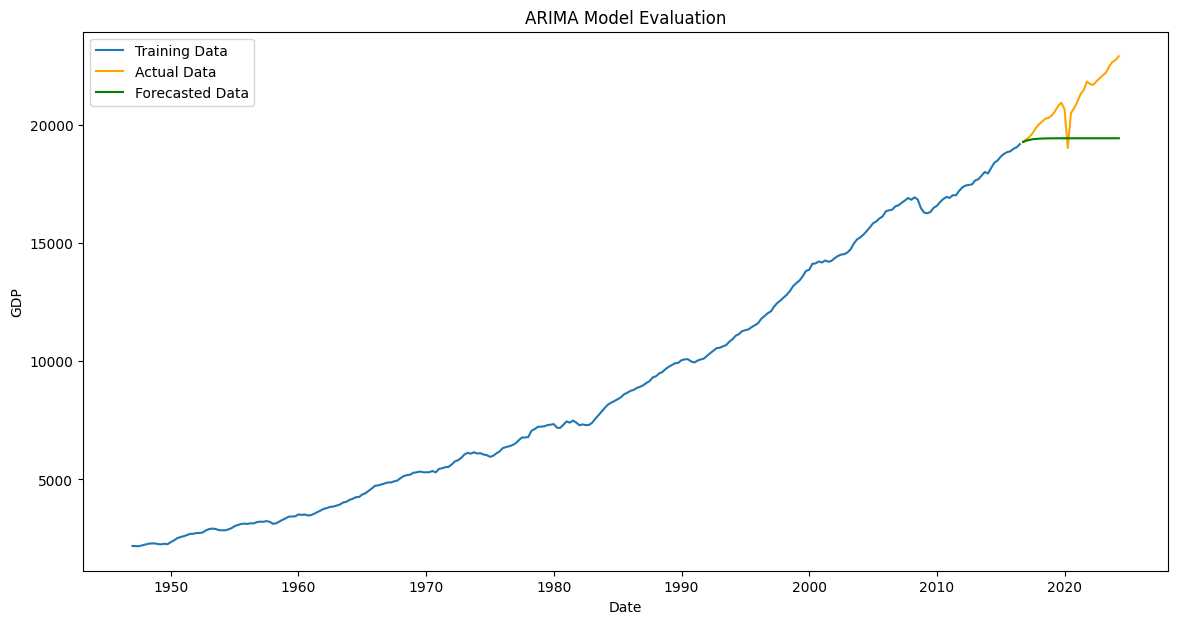

Metric                      Value
--------------------------  --------
RMSE                        1879.65
MAPE                        7.27%
AIC                         3179.32
BIC                         3186.58
Dickey Fuller Stat          -38.65
Dickey Fuller p-value       0.000000
Heteroskedasticity Stat     6.36
Heteroskedasticity p-value  0.000000
Jarque-Bera Stat            69.89
Jarque-Bera p-value         0.000000
Ljung-Box Stat              28.05
Ljung-Box p-value           0.000000
Durbin-Watson               1.34
Wald Stat                   464.71
Wald p-value                0.000000
CUSUM Stat                  3.31
CUSUM p-value               0.000000


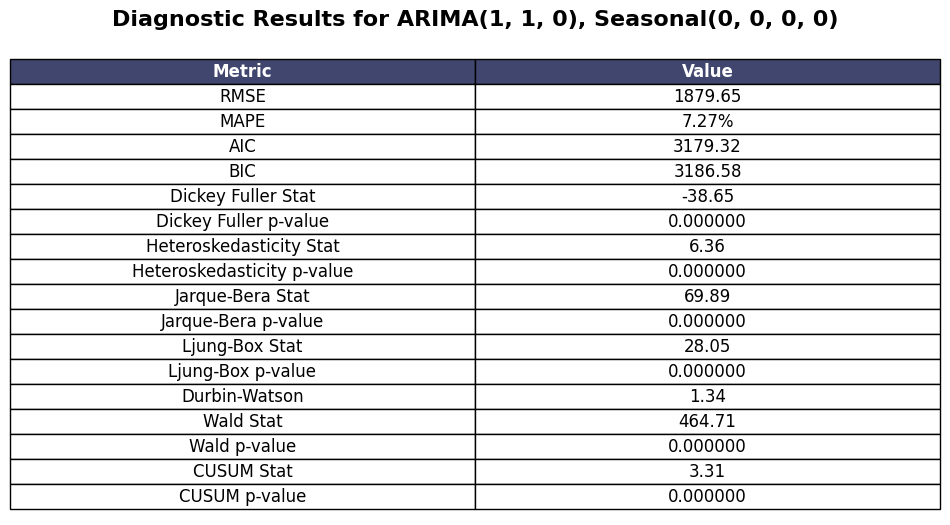

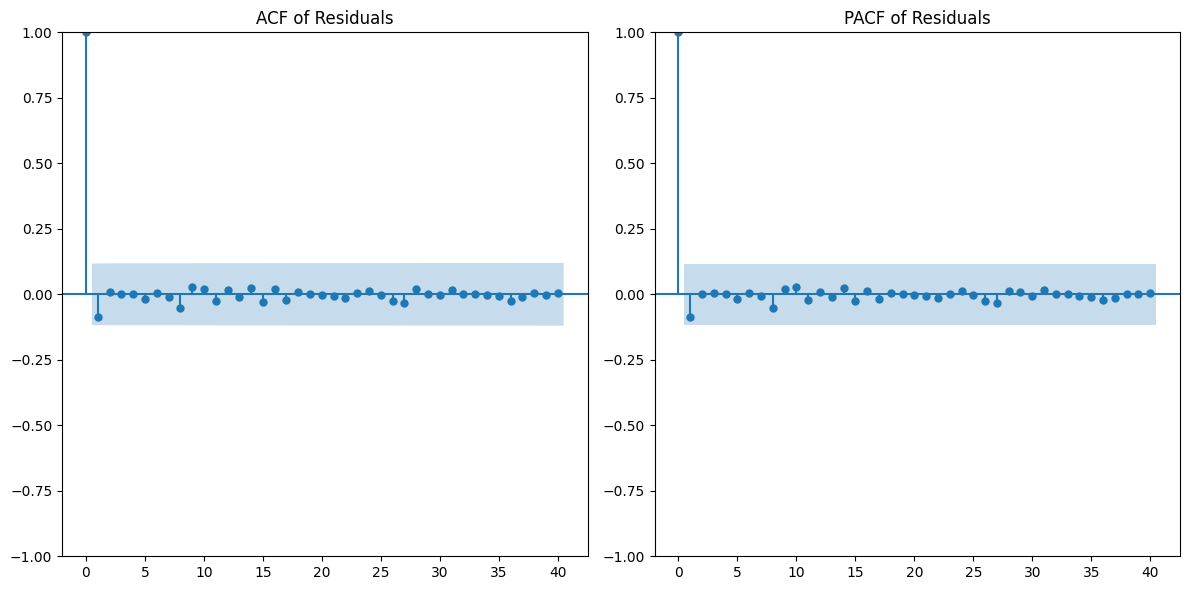

In [52]:
warnings.filterwarnings("ignore")

train_size = int(len(GDP_Forecast) * 0.90)
train, test = GDP_Forecast[0:train_size], GDP_Forecast[train_size:len(GDP_Forecast)]
p = 1
d = 1
q = 0

model_train = sm.tsa.ARIMA(train['Revised Value'], order=(p, d, q))
model_train_fit = model_train.fit()

forecast = model_train_fit.forecast(len(test))

test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = test_forecast.predicted_mean

model_fit = f"ARIMA{model_train.order}, Seasonal{model_train.seasonal_order}"
name = model_fit

rmse = root_mean_squared_error(test['Revised Value'], test_forecast_series)
mape = mean_absolute_percentage_error(test['Revised Value'], test_forecast_series)

aic =  model_train_fit.aic
bic = model_train_fit.bic

residuals = model_train_fit.resid

dw_statistic = durbin_watson(residuals)

ljung_box_test = model_train_fit.test_serial_correlation(method='ljungbox', lags=10)
ljung_box_stat = ljung_box_test[0, 0]  # Test statistic
ljung_box_pvalue = ljung_box_test[0, 1]  # p-value
ljung_box_stat = ljung_box_stat[0] if isinstance(ljung_box_stat, np.ndarray) else ljung_box_stat
ljung_box_pvalue = ljung_box_pvalue[0] if isinstance(ljung_box_pvalue, np.ndarray) else ljung_box_pvalue

jarque_bera_test = model_train_fit.test_normality(method='jarquebera')
jarque_bera_stat = jarque_bera_test[0][0] 
jarque_bera_pvalue = jarque_bera_test[0][1]  

heteroskedasticity_test = model_train_fit.test_heteroskedasticity('breakvar', 'two-sided')
heteroskedasticity_stat = heteroskedasticity_test[0, 0]  
heteroskedasticity_pvalue = heteroskedasticity_test[0, 1]

adf_test = adfuller(residuals)
dickey_fuller_stat = adf_test[0]
dickey_fuller_pvalue = adf_test[1]

r_matrix = np.eye(len(model_train_fit.params))
wald_test = model_train_fit.wald_test(r_matrix)

wald_statistic = wald_test.statistic[0][0] 
wald_pvalue = wald_test.pvalue

cusum_test = breaks_cusumolsresid(model_train_fit.resid)
cusum_test_stat = cusum_test[0]
cusum_test_pvalue = cusum_test[1]

plt.figure(figsize=(14,7))
plt.plot(train['Revised Value'], label='Training Data')
plt.plot(test['Revised Value'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
model1plot_path = "model1_plot_output.png"
plt.savefig(model1plot_path)
plt.show()


data = [
    ["Metric", "Value"],
    ["RMSE", f"{rmse:.2f}"],
    ["MAPE", f"{mape:.2%}"],
    ["AIC", f"{aic:.2f}"],
    ["BIC", f"{bic:.2f}"],
    ["Dickey Fuller Stat", f"{dickey_fuller_stat:.2f}"],
    ["Dickey Fuller p-value", f"{dickey_fuller_pvalue:.6f}"],
    ["Heteroskedasticity Stat", f"{heteroskedasticity_stat:.2f}"],
    ["Heteroskedasticity p-value", f"{heteroskedasticity_pvalue:.6f}"],
    ["Jarque-Bera Stat", f"{jarque_bera_stat:.2f}"],
    ["Jarque-Bera p-value", f"{jarque_bera_pvalue:.6f}"],
    ["Ljung-Box Stat", f"{ljung_box_stat:.2f}"],
    ["Ljung-Box p-value", f"{ljung_box_pvalue:.6f}"],
    ["Durbin-Watson", f"{dw_statistic:.2f}"],
    ["Wald Stat", f"{wald_statistic:.2f}"],
    ["Wald p-value", f"{wald_pvalue:.6f}"],
    ["CUSUM Stat", f"{cusum_test_stat:.2f}"],
    ["CUSUM p-value", f"{cusum_test_pvalue:.6f}"]
]


print(tabulate(data, headers="firstrow"))

title = f"Diagnostic Results for {model_fit}"


fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

table = ax.table(cellText=data, colLabels=None, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5) 

table[0, 0].set_facecolor("#40466e")
table[0, 1].set_facecolor("#40466e")
table[0, 0].set_text_props(color="w", weight="bold")
table[0, 1].set_text_props(color="w", weight="bold")

ax.set_title(title, fontweight="bold", fontsize=16, pad=20)

model1table_path = "model1_table_output.png"
plt.savefig(model1table_path, bbox_inches='tight', pad_inches=0.5, dpi=300)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(122)
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
model1acf_path = "model1_acfpacf_output.png"
plt.savefig(model1acf_path)
plt.show()

# Model 1 Specification

ACF & PACF plots suggested an ARIMA(1,1,0) model
### Non-Seasonal Components: ARIMA(p, d, q)
- **p = 1**: AR component of lag 1
- **d = 1**: Differencing once to make the series stationary
- **q = 0**: No moving average component


# Model 1 Performance
Despite the previous ACF & PACF plots suggesting an ARIMA(1,1,0) model, the actual performance of the model is very poor.
- AR (Auto-Regressive) Lag of 1: Significant
- RMSE (Root Mean Squared Error): Value of 1,879
- MAPE (Mean Absolute Percentage Error): Value of 7.27%
- AIC (Akaike Information Criterion): Value of 3,179
- BIC (Bayesian Information Criterion): Value of 3,186
### Tests:

- **Stationarity - Dickey-Fuller Test**:
  - **Purpose**: Measures whether the data is stationary and whether a unit root exists (null hypothesis of non-stationarity)
  - **Results**: ADF test with a single difference returns a significant p-value, rejecting the null hypothesis of non-stationarity
  - **Implication**: The data is now stationary and no longer contains a unit root
 
- **Constant Variance - Heteroskedasticity Test**:
  - **Purpose**: Measures whether heteroskedasticity exists in the model residuals (null hypothesis of homoskedasticity)
  - **Results**: Test statistic of 6.36H and a significant p-value, indicating heteroskedasticity is present
  - **Implication**: Residuals do not have constant variance, affecting the efficiency and reliability of coefficient estimates and their standard errors, leading to incorrect inferences from the model
 
- **Normality - Jarque-Bera Test**:
  - **Purpose**: Measures whether the residuals are normally distributed or have skewness and kurtosis (null hypothesis of normality)
  - **Results**: High test statistic of 70 and a significant p-value, rejecting the null hypothesis of normality
  - **Implication**: Residuals are not normally distributed, suggesting the model has not captured all patterns in the data and violates the normality assumption

- **Autocorellation - Ljung-Box Test**:
  - **Purpose**: Measures whether autocorrelation exists in the model residuals (Null hypothesis of no autocorrelation)
  - **Results**: Test statistic of 28 and a significant p-value, confirming significant autocorrelation in the residuals and rejecting the null hypothesis that the model residuals are independently distributed
  - **Implication**: The model has not captured all patterns in the data, indicating inadequacy
 
- **Autocorellation - Durbin-Watson Test**:
  - **Purpose**: Measures whether autocorrelation exists in the residuals. Value of 2 is no autocorrelation, below 2 is positive autocorrelation (a positive error is likely to be followed by another positive error) and above 2 is negative autocorrelation (a negative error is likely to be followed by another negative error)
  - **Results**: DW statistic of 1.34, indicating some positive autocorrelation in the residuals
  - **Implication**: The positive autocorrelation suggests that patterns in the data are not fully captured by the model

- **Linearity - Wald Test**:
  - **Purpose**: Tests the significance of the parameter(s) and whether the relationship in the model is linear (null hypothesis that the parameter(s) are equal to zero)
  - **Results**: A Wald statistic of 464.71 with a very small p-value, indicating that the parameter(s) tested are highly significant and that the assumed linear relationship is valid
  - **Implication**: The AR(1) component or another specific parameter in the model is statistically significant, and the linearity assumption holds in this case
 
- **Structural Breakage - CUSUM Test**:
  - **Purpose**: Detects structural breaks or changes in the model parameters over time (null hypothesis that the parameters are stable)
  - **Results**: A CUSUM statistic of 3.31 with a very small p-value, indicating a significant structural break in the model
  - **Implication**: There is evidence of a structural break in the model, suggesting that the relationship between the variables may have changed over time due to external factors. The prescence of structural breaks may result in the need for more sophisticated modeling techniques

### ACF & PACF Plots:
- Lastly, the ACF & PACF of the residuals of the model show no signficance after lag 1 suggesting the model is a good fit to the data.

### Forecast
Reagrdless of certain positive attributes of the model, it has performed very poorly as shown by the lack of prediction accuracy, poor related accuracy metrics, failure to reject the null hypothesis in the Ljung Box & Jarque-Bera test, the presence of heteroskadasticity and the existance of structural breaks in the time series.

It's performance is most likely hindered due to:
- Inadequate Model Complexity: GDP is too complex of a variable for ARIMA models
- External Influences: Connected to the previous point, external variables are influencing GDP trends and results and addtional variables are currently not incorporated in the ARIMA model
- Hidden Seasonality: The model may in fact have some hidden seasonality that was not entirely displayed by the original ACF & PACF plots

We will need to explore different ARIMA models, possible transformations, other forecasting models besides ARIMA and eventually expand into incorporating additional variables. 

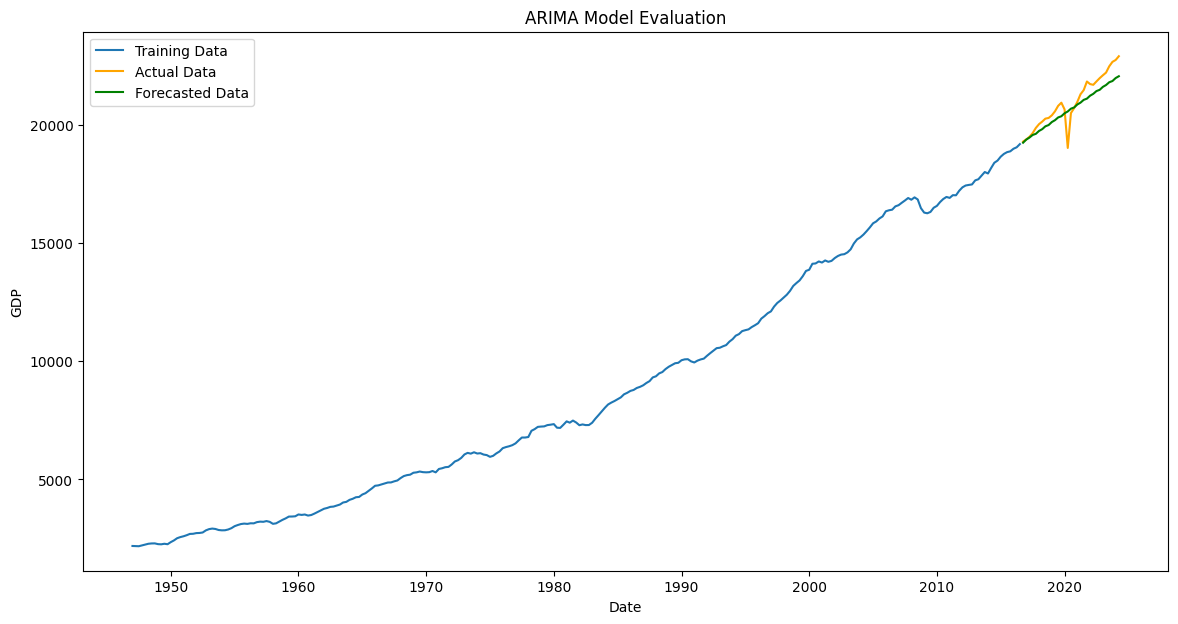

Metric                      Value
--------------------------  --------
RMSE                        516.14
MAPE                        1.94%
AIC                         3211.71
BIC                         3222.55
Dickey Fuller Stat          -7.76
Dickey Fuller p-value       0.000000
Heteroskedasticity Stat     6.65
Heteroskedasticity p-value  0.000000
Jarque-Bera Stat            139.93
Jarque-Bera p-value         0.000000
Ljung-Box Stat              0.17
Ljung-Box p-value           0.681082
Durbin-Watson               1.43
Wald Stat                   645.77
Wald p-value                0.000000
CUSUM Stat                  0.79
CUSUM p-value               0.563209


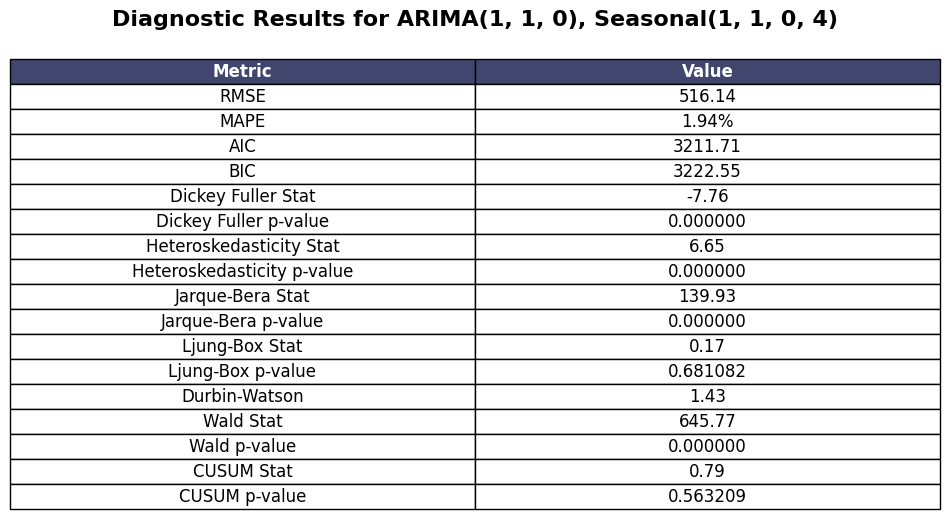

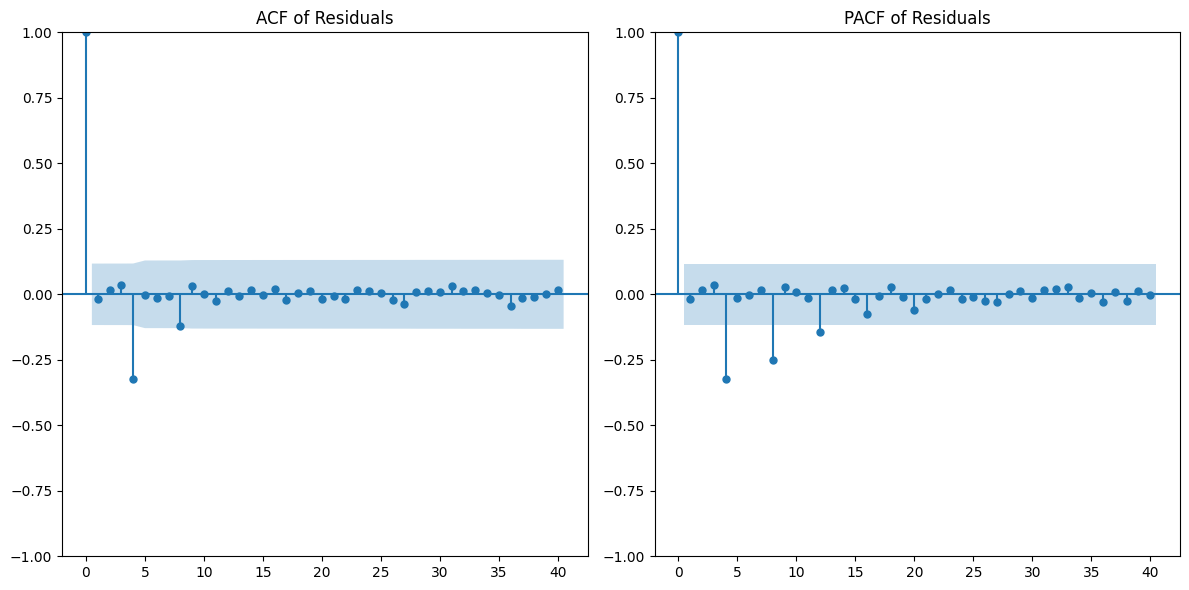

In [53]:
p, d, q = 1, 1, 0
P, D, Q, s = 1, 1, 0, 4 

seasonal_model = sm.tsa.ARIMA(train['Revised Value'], order=(p, d, q), seasonal_order=(P, D, Q, s))
seasonal_model_fit = seasonal_model.fit()

forecast = seasonal_model_fit.forecast(len(test))
test_forecast = seasonal_model_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

diff_series = train['Revised Value'].diff().dropna()
diff_series2 = diff_series.diff().dropna()
adf_result_diff2 = adfuller(diff_series2)

model_fit = f"ARIMA{seasonal_model.order}, Seasonal{seasonal_model.seasonal_order}"
name = model_fit

rmse = root_mean_squared_error(test['Revised Value'], test_forecast_series)
mape = mean_absolute_percentage_error(test['Revised Value'], test_forecast_series)

aic =  seasonal_model_fit.aic
bic = seasonal_model_fit.bic

residuals = seasonal_model_fit.resid

dw_statistic = durbin_watson(residuals)

ljung_box_test = seasonal_model_fit.test_serial_correlation(method='ljungbox', lags=10)
ljung_box_stat = ljung_box_test[0, 0] 
ljung_box_pvalue = ljung_box_test[0, 1] 
ljung_box_stat = ljung_box_stat[0] if isinstance(ljung_box_stat, np.ndarray) else ljung_box_stat
ljung_box_pvalue = ljung_box_pvalue[0] if isinstance(ljung_box_pvalue, np.ndarray) else ljung_box_pvalue

jarque_bera_test = seasonal_model_fit.test_normality(method='jarquebera')
jarque_bera_stat = jarque_bera_test[0][0] 
jarque_bera_pvalue = jarque_bera_test[0][1]  

heteroskedasticity_test = seasonal_model_fit.test_heteroskedasticity('breakvar', 'two-sided')
heteroskedasticity_stat = heteroskedasticity_test[0, 0]  
heteroskedasticity_pvalue = heteroskedasticity_test[0, 1]

adf_test = adfuller(residuals)
dickey_fuller_stat = adf_test[0]
dickey_fuller_pvalue = adf_test[1]

r_matrix = np.eye(len(seasonal_model_fit.params))
wald_test = seasonal_model_fit.wald_test(r_matrix)

wald_statistic = wald_test.statistic[0][0] 
wald_pvalue = wald_test.pvalue

cusum_test = breaks_cusumolsresid(seasonal_model_fit.resid)
cusum_test_stat = cusum_test[0]
cusum_test_pvalue = cusum_test[1]

plt.figure(figsize=(14,7))
plt.plot(train['Revised Value'], label='Training Data')
plt.plot(test['Revised Value'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
model2plot_path = "model2_plot_output.png"
plt.savefig(model2plot_path)
plt.show()


data = [
    ["Metric", "Value"],
    ["RMSE", f"{rmse:.2f}"],
    ["MAPE", f"{mape:.2%}"],
    ["AIC", f"{aic:.2f}"],
    ["BIC", f"{bic:.2f}"],
    ["Dickey Fuller Stat", f"{dickey_fuller_stat:.2f}"],
    ["Dickey Fuller p-value", f"{dickey_fuller_pvalue:.6f}"],
    ["Heteroskedasticity Stat", f"{heteroskedasticity_stat:.2f}"],
    ["Heteroskedasticity p-value", f"{heteroskedasticity_pvalue:.6f}"],
    ["Jarque-Bera Stat", f"{jarque_bera_stat:.2f}"],
    ["Jarque-Bera p-value", f"{jarque_bera_pvalue:.6f}"],
    ["Ljung-Box Stat", f"{ljung_box_stat:.2f}"],
    ["Ljung-Box p-value", f"{ljung_box_pvalue:.6f}"],
    ["Durbin-Watson", f"{dw_statistic:.2f}"],
    ["Wald Stat", f"{wald_statistic:.2f}"],
    ["Wald p-value", f"{wald_pvalue:.6f}"],
    ["CUSUM Stat", f"{cusum_test_stat:.2f}"],
    ["CUSUM p-value", f"{cusum_test_pvalue:.6f}"]
]

title = f"Diagnostic Results for {model_fit}"

print(tabulate(data, headers="firstrow"))

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

table = ax.table(cellText=data, colLabels=None, cellLoc='center', loc='center')
title = f"Diagnostic Results for {model_fit}"

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5) 

table[0, 0].set_facecolor("#40466e")
table[0, 1].set_facecolor("#40466e")
table[0, 0].set_text_props(color="w", weight="bold")
table[0, 1].set_text_props(color="w", weight="bold")

ax.set_title(title, fontweight="bold", fontsize=16, pad=20)

model2table_path = "model2_table_output.png"
plt.savefig(model2table_path, bbox_inches='tight', pad_inches=0.5, dpi=300)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(122)
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
model2acf_path = "model2_acfpacf_output.png"
plt.savefig(model2acf_path)
plt.show()

# Model 2 Specification
After adding the seasonality component to create an ARIMA(1, 1, 0)(1, 1, 0, 4) model, the performance of the model has greatly improved.

### Non-Seasonal Components: ARIMA(p, d, q)
- **p = 1**: AR component of lag 1
- **d = 1**: Differencing once to make the series stationary
- **q = 0**: No moving average component

### Seasonal Components: ARIMA(P, D, Q)s
- **P = 1**: Seasonal AR component of seasonal lag 1
- **D = 1**: Seasonal differencing once
- **Q = 0**: No seasonal moving average component
- **s = 4**: Quarterly seasonality

# Model 2 Performance
Model two is a singificant improvement on model 1 as shown.
- RMSE (Root Mean Squared Error): Value of 516 down from 1,879
- MAPE (Mean Absolute Percentage Error): Value of 1.94% down from 7.27%
- AIC (Akaike Information Criterion): Value of 3,211 up from 3,179
- BIC (Bayesian Information Criterion): Value of 3,222 up from 3,186
### Tests:

- **Stationarity - Dickey-Fuller Test**:
  - **Purpose**: Measures whether the data is stationary and whether a unit root exists
  - **Results**: ADF test with a single difference returns a significant p-value, rejecting the null hypothesis of non-stationarity
  - **Implication**: The data is now stationary and no longer contains a unit root
 
- **Constant Variance - Heteroskedasticity Test**:
  - **Purpose**: Measures whether heteroskedasticity exists in the model residuals
  - **Results**: Test statistic of 6.65H and a significant p-value, indicating heteroskedasticity is present
  - **Implication**: Residuals do not have constant variance, affecting the efficiency and reliability of coefficient estimates and their standard errors. This can lead to incorrect inferences from the model
 
- **Normality - Jarque-Bera Test**:
  - **Purpose**: Measures whether the residuals are normally distributed or have skewness and kurtosis
  - **Results**: High test statistic of 140 and a significant p-value, rejecting the null hypothesis of normality
  - **Implication**: Residuals are not normally distributed, suggesting the model has not captured all patterns in the data and violates the normality assumption

- **Autocorrelation - Ljung-Box Test**:
  - **Purpose**: Measures whether autocorrelation exists in the model residuals
  - **Results**: Test statistic of 0.17 and a non-significant p-value, supporting the null hypothesis that the residuals are independently distributed (no autocorrelation present)
  - **Implication**: The model has adequately captured the time series structure

- **Autocorrelation - Durbin-Watson Test**:
  - **Purpose**: Value of 2 is no autocorrelation, below 2 is positive autocorrelation (a positive error is likely to be followed by another positive error) and above 2 is negative autocorrelation (a negative error is likely to be followed by another negative error)
  - **Results**: DW statistic of 1.43, indicating some positive autocorrelation in the residuals
  - **Implication**: While an improvement from the previous model, the positive autocorrelation suggests that patterns in the data are not fully captured by the model
 
- **Linearity - Wald Test**:
  - **Purpose**: Tests the significance of the parameter(s) and whether the relationship in the model is linear (null hypothesis that the parameter(s) are equal to zero)
  - **Results**: The Wald statistic is 645.77, with a sginficiant p-value, indicating that the parameters tested are statistically significant together. This suggests that the linear relationship in the model is strong.
  - **Implication**: The Wald test confirms that the model parameters are contributing meaningfully to the model, which supports the linearity assumption. The current model structure is likely appropriate

- **Structural Breakage - CUSUM Test**:
  - **Purpose**: Detects structural breaks or changes in the model parameters over time (null hypothesis that the parameters are stable)
    - **Results**: A CUSUM statistic of 0.79 with a p-value of 0.56 indicates that there is no significant structural break in the model. It would appear that the introduction of seasonality resolved structural issues in the residuals
    - **Implication**: The absence of significant structural breaks suggests that the relationship between the variables remains stable over time. The model likely performs consistently

### ACF & PACF Plots:
- Lastly, the ACF & PACF of the residuals of the model show signficance after lag 1 suggesting the model is not optimally fit

### Forecast
Overall the model is an improvement upon the previous model as shown by the imporoved RMSE, MAPE, Ljung-Box, Durbin Watson and CUSUM test values

Although it is an improvement, performance is still most likely hindered due to:
- Inadequate Model Complexity: GDP is too complex of a variable for ARIMA models
- External Influences: Connected to the previous point, external variables are influencing GDP trends and results and addtional variables are currently not incorporated in the ARIMA model

The process of creating Model 2 has been entirely manual and based on intepreting the results of various outputs and tests. However, automated functions exist that search for the combination of models that minimizes the Akaike information criterion (AIC) which estimates how well a model fits the data.

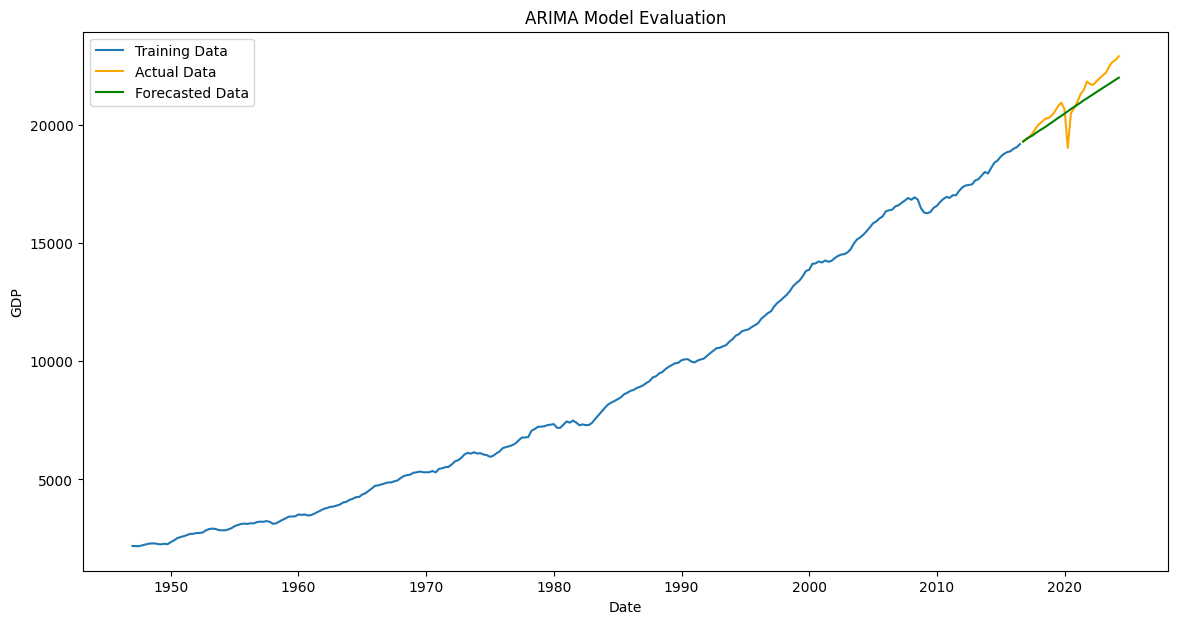

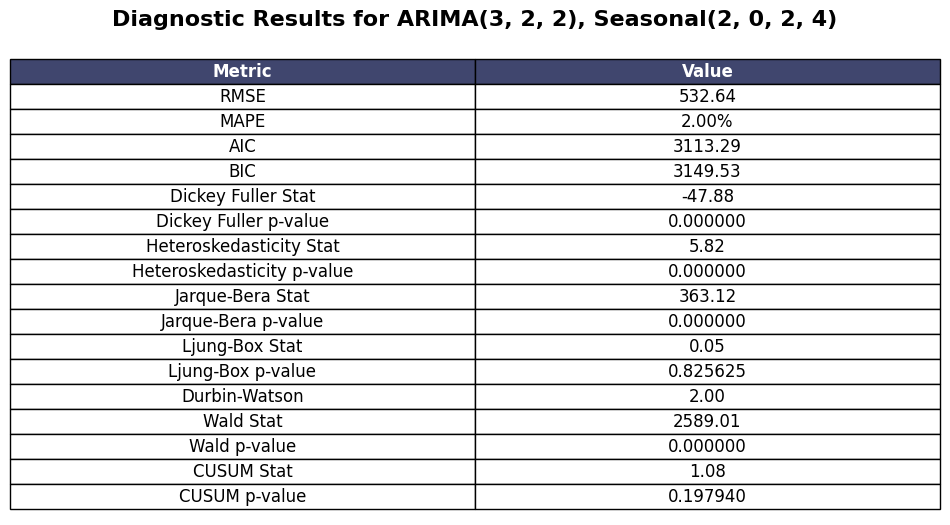

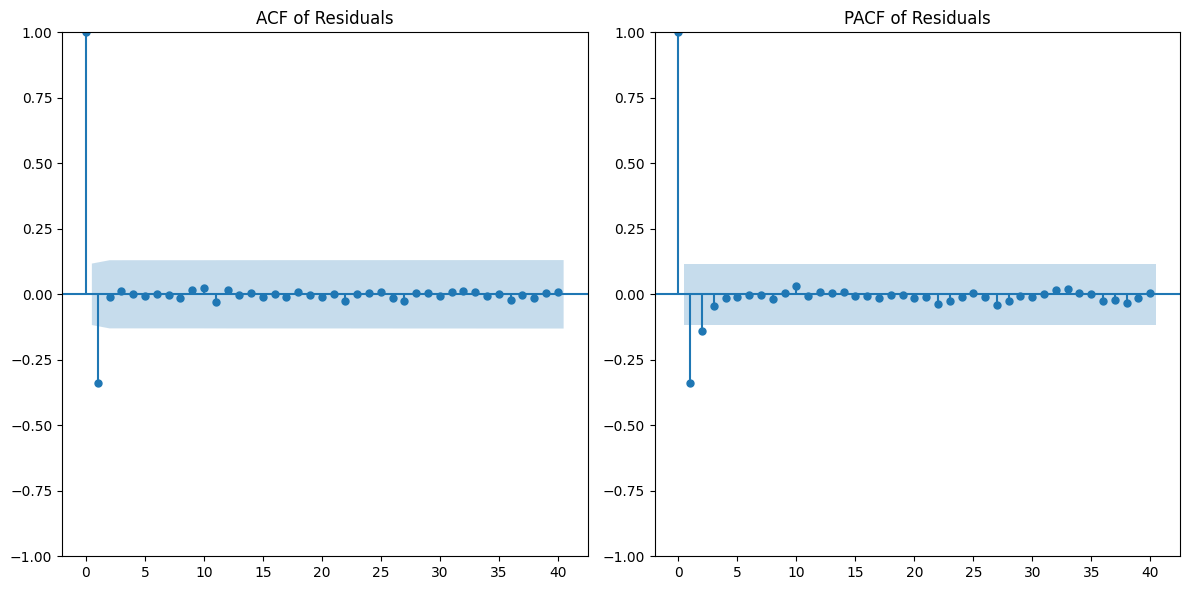

In [54]:

# Auto ARIMA to find the best model
model = pm.auto_arima(train, seasonal=True, m=4, stepwise=True)

order = model.order
seasonal_order = model.seasonal_order

sarimax_model = sm.tsa.SARIMAX(train['Revised Value'], 
                               order=order, 
                               seasonal_order=seasonal_order)
sarimax_model_fit = sarimax_model.fit()

forecast_sarimax = sarimax_model_fit.forecast(steps=len(test))

diff_series = train['Revised Value'].diff().dropna()
diff_series2 = diff_series.diff().dropna()
adf_result_diff2 = adfuller(diff_series2)

model_fit = f"ARIMA{order}, Seasonal{seasonal_order}"

name = model_fit

rmse = root_mean_squared_error(test['Revised Value'], forecast_sarimax)
mape = mean_absolute_percentage_error(test['Revised Value'], forecast_sarimax)

aic =  sarimax_model_fit.aic
bic = sarimax_model_fit.bic

residuals = sarimax_model_fit.resid

dw_statistic = durbin_watson(residuals)

ljung_box_test = sarimax_model_fit.test_serial_correlation(method='ljungbox', lags=10)
ljung_box_stat = ljung_box_test[0, 0] 
ljung_box_pvalue = ljung_box_test[0, 1] 
ljung_box_stat = ljung_box_stat[0] if isinstance(ljung_box_stat, np.ndarray) else ljung_box_stat
ljung_box_pvalue = ljung_box_pvalue[0] if isinstance(ljung_box_pvalue, np.ndarray) else ljung_box_pvalue

jarque_bera_test = sarimax_model_fit.test_normality(method='jarquebera')
jarque_bera_stat = jarque_bera_test[0][0] 
jarque_bera_pvalue = jarque_bera_test[0][1]  

heteroskedasticity_test = sarimax_model_fit.test_heteroskedasticity('breakvar', 'two-sided')
heteroskedasticity_stat = heteroskedasticity_test[0, 0]  
heteroskedasticity_pvalue = heteroskedasticity_test[0, 1]

adf_test = adfuller(residuals)
dickey_fuller_stat = adf_test[0]
dickey_fuller_pvalue = adf_test[1]

r_matrix = np.eye(len(sarimax_model_fit.params))
wald_test = sarimax_model_fit.wald_test(r_matrix)

wald_statistic = wald_test.statistic[0][0] 
wald_pvalue = wald_test.pvalue

cusum_test = breaks_cusumolsresid(sarimax_model_fit.resid)
cusum_test_stat = cusum_test[0]
cusum_test_pvalue = cusum_test[1]

plt.figure(figsize=(14,7))
plt.plot(train['Revised Value'], label='Training Data')
plt.plot(test['Revised Value'], label='Actual Data', color='orange')
plt.plot(forecast_sarimax, label='Forecasted Data', color='green')
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
model3plot_path = "model3_plot_output.png"
plt.savefig(model3plot_path)
plt.show()


data = [
    ["Metric", "Value"],
    ["RMSE", f"{rmse:.2f}"],
    ["MAPE", f"{mape:.2%}"],
    ["AIC", f"{aic:.2f}"],
    ["BIC", f"{bic:.2f}"],
    ["Dickey Fuller Stat", f"{dickey_fuller_stat:.2f}"],
    ["Dickey Fuller p-value", f"{dickey_fuller_pvalue:.6f}"],
    ["Heteroskedasticity Stat", f"{heteroskedasticity_stat:.2f}"],
    ["Heteroskedasticity p-value", f"{heteroskedasticity_pvalue:.6f}"],
    ["Jarque-Bera Stat", f"{jarque_bera_stat:.2f}"],
    ["Jarque-Bera p-value", f"{jarque_bera_pvalue:.6f}"],
    ["Ljung-Box Stat", f"{ljung_box_stat:.2f}"],
    ["Ljung-Box p-value", f"{ljung_box_pvalue:.6f}"],
    ["Durbin-Watson", f"{dw_statistic:.2f}"],
    ["Wald Stat", f"{wald_statistic:.2f}"],
    ["Wald p-value", f"{wald_pvalue:.6f}"],
    ["CUSUM Stat", f"{cusum_test_stat:.2f}"],
    ["CUSUM p-value", f"{cusum_test_pvalue:.6f}"]
]

title = f"Diagnostic Results for {model_fit}"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

table = ax.table(cellText=data, colLabels=None, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5) 

table[0, 0].set_facecolor("#40466e")
table[0, 1].set_facecolor("#40466e")
table[0, 0].set_text_props(color="w", weight="bold")
table[0, 1].set_text_props(color="w", weight="bold")

ax.set_title(title, fontweight="bold", fontsize=16, pad=20)

model3table_path = "model3_table_output.png"
plt.savefig(model3table_path, bbox_inches='tight', pad_inches=0.5, dpi=300)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(122)
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
model3acf_path = "model3_acfpacf_output.png"
plt.savefig(model3acf_path)
plt.show()

# Model 3 Specification

Auto-Arima searches for the model that minimizes the AIC of the given time series data. The resulting step-wise search found the SARIMA(3, 2, 2)(2, 0, 2, 4) model to be the best fit and minimize the AIC.

### Non-Seasonal Components: ARIMA(p, d, q)
- **p = 3**: AR component of 2 lags
- **d = 2**: Differencing twice to make the series stationary
- **q = 2**: MA component of 2 lags

### Seasonal Components: ARIMA(P, D, Q)s
- **P = 2**: Seasonal AR component of seasonal lags 4 and 8
- **D = 0**: No seasonal differencing
- **Q = 2**: Seasonal MA components reflecting seasonal lags 4 and 8
- **s = 4**: Quarterly seasonality


# Model 3 Performance
The adjustments result in a marginal improvement in the overall mode if any improvement at all.
- RMSE (Root Mean Squared Error): Value of 532 up from 516
- MAPE (Mean Absolute Percentage Error): Value of 2% up from 1.94%
- AIC (Akaike Information Criterion): Value of 3,100 down from 3,113
- BIC (Bayesian Information Criterion): Value of 3,129 up from 3,127
### Tests:

- **Sationarity - Dickey-Fuller Test**:
  - **Purpose**: Measures whether the data is stationary and whether a unit root exists
  - **Results**: Significant p-value after two differences, rejecting the null hypothesis of non-stationarity
  - **Implication**: Data is now stationary and no longer contains a unit root
 
- **Constant Variance - Heteroskedasticity Test**:
  - **Purpose**: Measures whether heteroskedasticity exists in the residuals
  - **Results**: Test statistic of 5.82H and a significant p-value, indicating heteroskedasticity is present
  - **Implication**: Residuals do not have constant variance, affecting the efficiency and reliability of coefficient estimates and their standard errors

- **Normality - Jarque-Bera Test**:
  - **Purpose**: Measures whether the residuals are normally distributed
  - **Results**: High test statistic of 363 and a significant p-value, rejecting the null hypothesis of normality
  - **Implication**: Residuals are not normally distributed, suggesting the model has not captured all patterns in the data and violates the normality assumption

- **Autocorrelation - Ljung-Box Test**:
  - **Purpose**: Measures whether autocorrelation exists in the residuals
  - **Results**: Test statistic of 0.05 and a non-significant p-value, supporting the null hypothesis that the residuals are independently distributed (no autocorrelation present)
  - **Implication**: The model has adequately captured the time series structure

- **Autocorrelation - Durbin-Watson Test**:
  - **Purpose**: Value of 2 is no autocorrelation, below 2 is positive autocorrelation (a positive error is likely to be followed by another positive error) and above 2 is negative autocorrelation (a negative error is likely to be followed by another negative error)
  - **Results**: DW statistic of 2.00, indicating no autocorrelation
  - **Implication**: The model residuals show no signs of autocorrelation, improving upon previous models

- **Linearity - Wald Test**:
  - **Purpose**: Tests the significance of the parameter(s) and whether the relationship in the model is linear (null hypothesis that the parameter(s) are equal to zero)
  - **Results**: The Wald statistic with a significant pvalue indicates that the parameters tested are statistically significant together. This suggests that the linear relationship in the model is strong.
  - **Implication**: The Wald test confirms that the model parameters are contributing meaningfully to the model, which supports the linearity assumption. The current model structure is likely appropriate

- **Structural Breakage - CUSUM Test**:
  - **Purpose**: Detects structural breaks or changes in the model parameters over time (null hypothesis that the parameters are stable)
    - **Results**: A CUSUM statistic of 1.08 with an insignificant p-value of 0.19 indicates that there is no significant structural break in the model. It would appear that the introduction of seasonality resolved structural issues in the residuals
    - **Implication**: The absence of significant structural breaks suggests that the relationship between the variables remains stable over time. The model likely performs consistently

### ACF & PACF Plots:
- Lastly, the ACF & PACF of the residuals of the model show no real significance after the first 2 lags

### Forecast
Overall the model is an improvement upon the first model and a marginal improvement upon the second as shown by the imporoved RMSE, MAPE, Ljung-Box and Durbin Watson test values (no residual autocorrelation). Regardless, the residuals are still not normally distributed or exhibit constant variance as shown by the Jarque-Bera Test and Heterskedasticity test.

Although it is an improvement, performance is still most likely hindered due to:
- Inadequate Model Complexity: GDP is too complex of a variable for ARIMA models
- External Influences: Connected to the previous point, external variables are influencing GDP trends and results and addtional variables are currently not incorporated in the ARIMA model

What else can be done to improve the given ARIMA model? We can apply transformation and try other type of modeling methods
- Log, reciprocal (1/x), square root, box-cox, HP and other transformations
- Apply exponential ETS (Error Trend and Seasonality, or exponential smoothing) model
- Apply decomposition to the data and use the decomposed parts for ARIMA forecasting
- Apply LSTM (Long Short-Term Memory) model

In [55]:
transformations = {
    'Normal (No)': train['Revised Value'],
    'Log': np.log(train['Revised Value']),
    'LN': np.log10(train['Revised Value']),
    'Reciprocal': 1 / train['Revised Value'],
    'Square Root': np.sqrt(train['Revised Value']),
    'Box-Cox': boxcox(train['Revised Value'])[0],
    'HP Filter': sm.tsa.filters.hpfilter(train['Revised Value'], lamb=1600)[1],
    '% Change': train['Revised Value'].pct_change().dropna()
}

In [56]:
model_list = []
model_results = []
aic_list = []
bic_list = []
rmse_list = []
mape_list = []
dw_list = []
ljung_box_list = []
jarque_bera_list = []
heteroskedasticity_list = []
dickey_fuller_list = []
wald_list = []
cusum_list = []
forecast_list = []

for name, transformed_series in transformations.items():
    auto_model = pm.auto_arima(transformed_series, seasonal=True, m=4, stepwise=True, error_action='ignore')
    print(name)
    order = auto_model.order
    seasonal_order = auto_model.seasonal_order
    
    sarimax_model = sm.tsa.SARIMAX(transformed_series, 
                                   order=order, 
                                   seasonal_order=seasonal_order)
    sarimax_model_fit = sarimax_model.fit()
    
    test_forecast = sarimax_model_fit.forecast(steps=len(test))

    model_fit = f"ARIMA{order}, Seasonal{seasonal_order}"
    model_list.append((name, model_fit))  

    if name == 'Log':
        test_forecast = np.exp(test_forecast)
    if name == 'LN':
        test_forecast = 10 ** test_forecast
    elif name == 'Reciprocal':
        test_forecast = 1 / test_forecast
    elif name == 'Square Root':
        test_forecast = test_forecast ** 2
    elif name == 'Box-Cox':
        test_forecast = inv_boxcox(test_forecast, boxcox(train['Revised Value'])[1])
    elif name == 'HP Filter':
        trend_component = sm.tsa.filters.hpfilter(train['Revised Value'])[0]
        test_forecast = test_forecast + trend_component[-len(test_forecast):].values
    elif name == '% Change':
        base_value = train['Revised Value'].iloc[-1]
        test_forecast = base_value * (1 + test_forecast).cumprod()

    forecast_list.append((name, test_forecast))
    rmse = root_mean_squared_error(test['Revised Value'], test_forecast)
    mape = mean_absolute_percentage_error(test['Revised Value'], test_forecast)

    rmse_list.append((name, rmse))
    mape_list.append((name, mape))

    
    aic =  sarimax_model_fit.aic
    bic = sarimax_model_fit.bic

    aic_list.append((name, aic))
    bic_list.append((name, bic))

    
    residuals = sarimax_model_fit.resid
    
    dw_statistic = durbin_watson(residuals)
    dw_list.append((name, dw_statistic))
    
    ljung_box_test = sarimax_model_fit.test_serial_correlation(method='ljungbox', lags=10)
    ljung_box_stat = ljung_box_test[0, 0] 
    ljung_box_pvalue = ljung_box_test[0, 1] 
    ljung_box_stat = ljung_box_stat[0] if isinstance(ljung_box_stat, np.ndarray) else ljung_box_stat
    ljung_box_pvalue = ljung_box_pvalue[0] if isinstance(ljung_box_pvalue, np.ndarray) else ljung_box_pvalue
    ljung_box_list.append((name, ljung_box_stat, ljung_box_pvalue))
    
    
    jarque_bera_test = sarimax_model_fit.test_normality(method='jarquebera')
    jarque_bera_stat = jarque_bera_test[0][0] 
    jarque_bera_pvalue = jarque_bera_test[0][1]  
    jarque_bera_list.append((name, jarque_bera_stat, jarque_bera_pvalue))
    
    heteroskedasticity_test = sarimax_model_fit.test_heteroskedasticity('breakvar', 'two-sided')
    heteroskedasticity_stat = heteroskedasticity_test[0, 0]  
    heteroskedasticity_pvalue = heteroskedasticity_test[0, 1]
    heteroskedasticity_list.append((name, heteroskedasticity_stat, heteroskedasticity_pvalue))

    adf_test = adfuller(residuals)
    dickey_fuller_stat = adf_test[0]
    dickey_fuller_pvalue = adf_test[1]
    dickey_fuller_list.append((name, dickey_fuller_stat, dickey_fuller_pvalue))

    
    r_matrix = np.eye(len(sarimax_model_fit.params))
    wald_test = sarimax_model_fit.wald_test(r_matrix)
    
    wald_statistic = wald_test.statistic[0][0] 
    wald_pvalue = wald_test.pvalue
    wald_list.append((name, wald_statistic, wald_pvalue))

    
    cusum_test = breaks_cusumolsresid(sarimax_model_fit.resid)
    cusum_test_stat = cusum_test[0]
    cusum_test_pvalue = cusum_test[1]
    cusum_list.append((name, cusum_test_stat, cusum_test_pvalue))

Normal (No)
Log
LN
Reciprocal
Square Root
Box-Cox
HP Filter
% Change


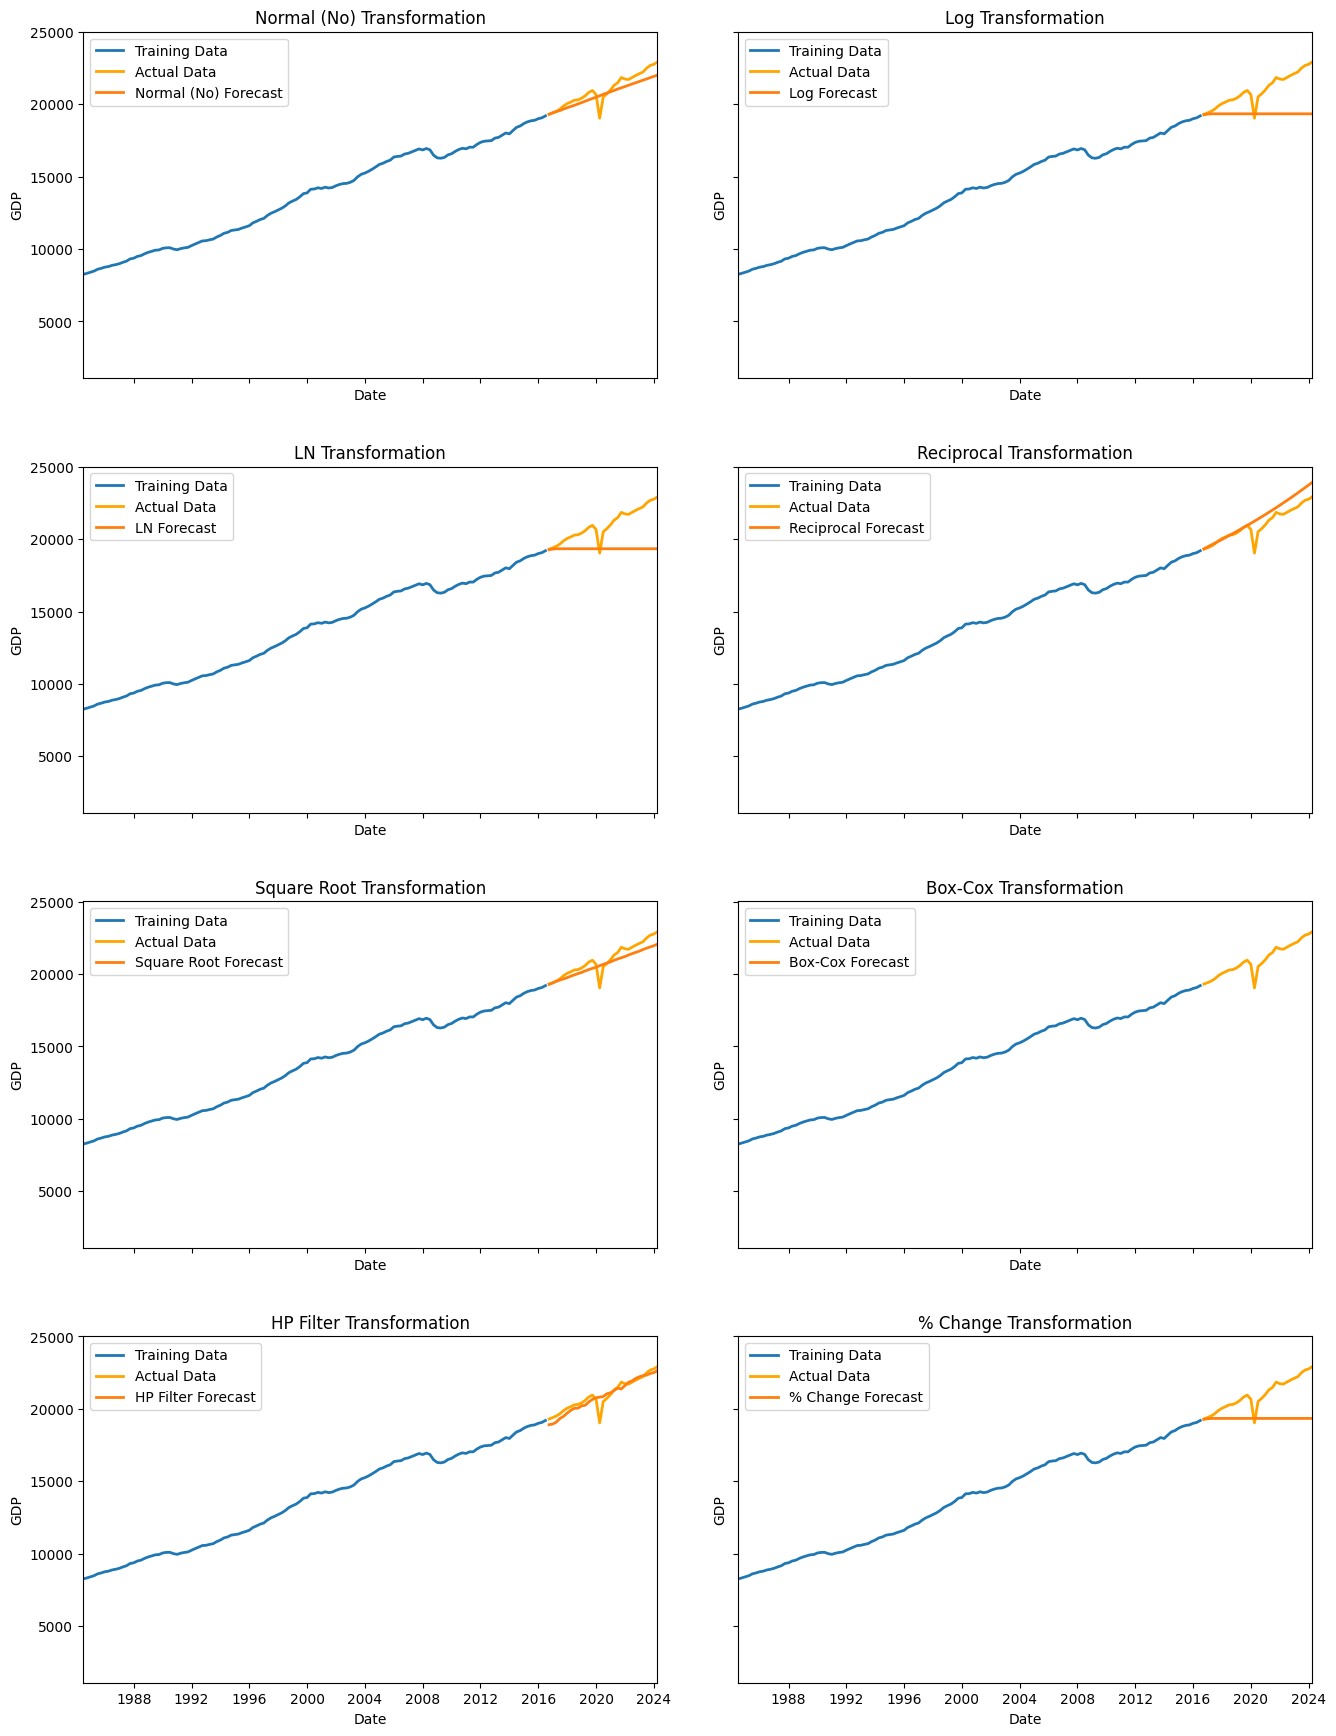

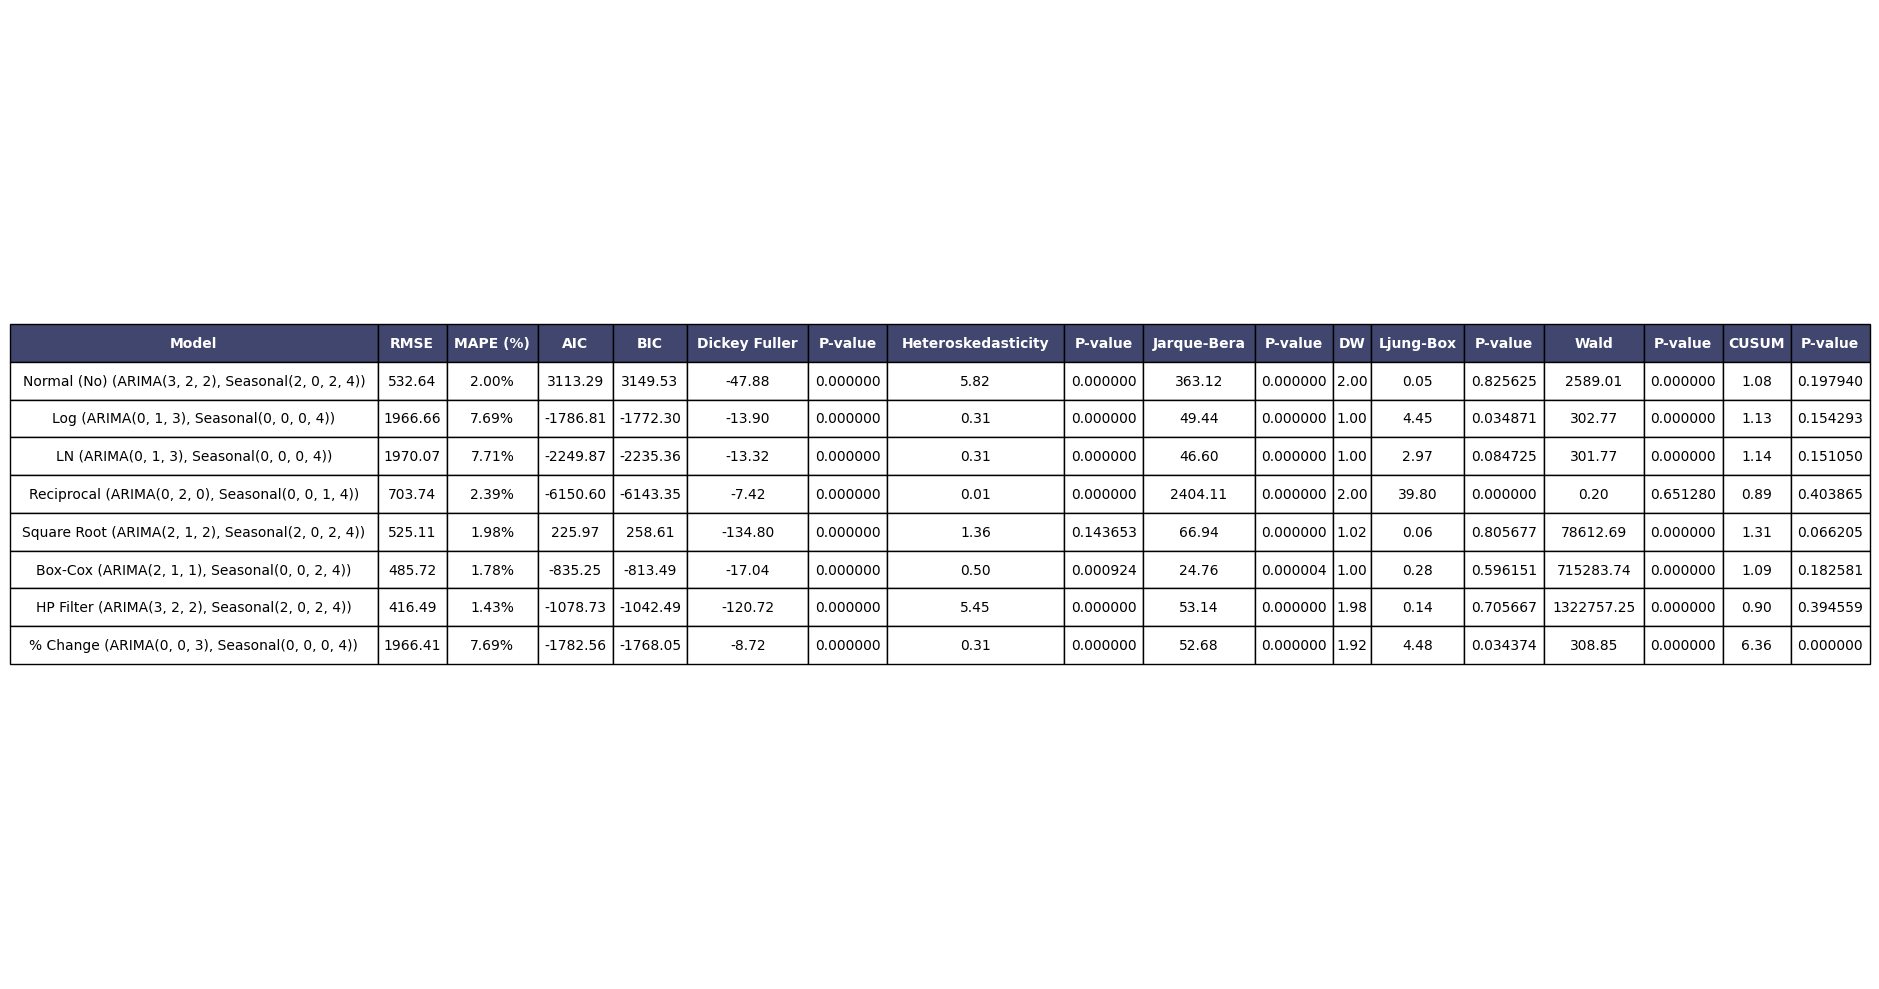

In [57]:

num_plots = len(forecast_list)
ncols = 2
nrows = (num_plots // ncols) + (num_plots % ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 18), sharex=True, sharey=True)
axes = axes.flatten()


for i, ((name, forecast), ax) in enumerate(zip(forecast_list, axes)):
    ax.plot(train['Revised Value'], label='Training Data', linewidth=2)
    ax.plot(test['Revised Value'], label='Actual Data', color='orange', linewidth=2)
    ax.plot(forecast, label=f'{name} Forecast', linewidth=2)
    ax.set_xlim(train.index[150], test.index[-1])
    ax.set_title(f'{name} Transformation')
    ax.set_xlabel('Date')
    ax.set_ylabel('GDP')
    ax.legend()

plt.tight_layout(pad=3.0)
model4plot_path = "model4_plot_output.png"
plt.savefig(model4plot_path)
plt.show()

table_data = []
for i in range(len(rmse_list)):
    name = f"{model_list[i][0]} ({model_list[i][1]})"
    rmse = rmse_list[i][1]
    mape = mape_list[i][1] * 100 
    aic = aic_list[i][1]
    bic = bic_list[i][1]
    dickey_fuller_stat = dickey_fuller_list[i][1]
    dickey_fuller_pvalue = dickey_fuller_list[i][2]
    heteroskedasticity_stat = heteroskedasticity_list[i][1]
    heteroskedasticity_pvalue = heteroskedasticity_list[i][2]
    jb_stat = jarque_bera_list[i][1]
    jb_pvalue = jarque_bera_list[i][2]
    ljung_box_stat = ljung_box_list[i][1]
    ljung_box_pvalue = ljung_box_list[i][2]
    dw_statistic = dw_list[i][1]
    wald_stat = wald_list[i][1]
    wald_pvalue = wald_list[i][2]
    cusum_stat = cusum_list[i][1]
    cusum_pvalue = cusum_list[i][2]

    table_data.append([
        name, 
        f"{rmse:.2f}", 
        f"{mape:.2f}%", 
        f"{aic:.2f}", 
        f"{bic:.2f}", 
        f"{dickey_fuller_stat:.2f}", 
        f"{dickey_fuller_pvalue:.6f}", 
        f"{heteroskedasticity_stat:.2f}", 
        f"{heteroskedasticity_pvalue:.6f}",
        f"{jb_stat:.2f}", 
        f"{jb_pvalue:.6f}", 
        f"{dw_statistic:.2f}", 
        f"{ljung_box_stat:.2f}", 
        f"{ljung_box_pvalue:.6f}", 
        f"{wald_stat:.2f}", 
        f"{wald_pvalue:.6f}", 
        f"{cusum_stat:.2f}", 
        f"{cusum_pvalue:.6f}",
    ])


headers = [
    "Model", 
    "RMSE", 
    "MAPE (%)", 
    "AIC", 
    "BIC", 
    "Dickey Fuller", 
    "P-value", 
    "Heteroskedasticity", 
    "P-value", 
    "Jarque-Bera", 
    "P-value", 
    "DW", 
    "Ljung-Box", 
    "P-value", 
    "Wald", 
    "P-value", 
    "CUSUM", 
    "P-value",
]


fig, ax = plt.subplots(figsize=(18, 10)) 
ax.axis('off')

table = ax.table(cellText=table_data, colLabels=headers, cellLoc='center', loc='center')

table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]) 

table.auto_set_font_size(False)
table.set_fontsize(10) 
table.scale(1.8, 1.8) 

for (i, j), cell in table.get_celld().items():
    if i == 0: 
        cell.set_text_props(weight='bold', color='w')
        cell.set_facecolor("#40466e")
    else:
        cell.set_text_props(ha="center", va="center", wrap=True)

plt.tight_layout()

model4table_path = "model4_table_output.png"
plt.savefig(model4table_path, bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

# Model 4 Specification:
Based on the above results and tests, the HP Filter: ARIMA(3, 2, 2), Seasonal(2, 0, 2, 4) model appears to result in the best overall fit out of the transformations and specifications done above. 
#### Non-Seasonal Components: ARIMA(p, d, q)
- **p = 3**: The model includes an autoregressive (AR) term of 3 lags
- **d = 2**: The model differences twice 
- **q = 2**: The model includes a moving average (MA) term of 2 lags

#### Seasonal Components: ARIMA(P, D, Q)s
- **P = 2**: The model includes two seasonal auto-regressive (SMA) from two seasonal periods ago (lag 4 and lag 8)
- **D = 0**: The model includes no seasonal differencing
- **Q = 2**: The model includes two seasonal moving average (SMA) of forecast errors from two seasonal periods ago (lag 4 and lag 8)
- **s = 4**: The model has a seasonal period of 4, which indicates quarterly seasonality

# Model 4 Performance
Performance improved quite a bit once again
- RMSE (Root Mean Squared Error): Value of 445  from 583
- MAPE (Mean Absolute Percentage Error): Value of 1.57% down from 2%
- AIC (Akaike Information Criterion): Absolute value of 202 signficantly down from 3,123
- BIC (Bayesian Information Criterion): Absolute value of 238 down from 3,149
### Tests:

- **Stationarity - Dickey-Fuller Test**:
  - **Purpose**: Measures whether the data is stationary and whether a unit root exists
  - **Results**: Significant p-value after differencing, rejecting the null hypothesis of non-stationarity
  - **Implication**: Data is now stationary and no longer contains a unit root
 
- **Constant Variance - Heteroskedasticity Test**:
  - **Purpose**: Measures whether heteroskedasticity exists in the residuals
  - **Results**: Test statistic of 5.45H and a significant p-value, indicating heteroskedasticity is present
  - **Implication**: Residuals have non-constant variance, indicating non-reliable coeffecient estimation

- **Normality - Jarque-Bera Test**:
  - **Purpose**: Measures whether the residuals are normally distributed
  - **Results**: A significant p-value, rejecting the null hypothesis of normality
  - **Implication**: Residuals are not normally distributed, suggesting the model has not captured all patterns in the data and violates the normality assumption

- **Autocorrelation - Ljung-Box Test**:
  - **Purpose**: Measures whether autocorrelation exists in the residuals
  - **Results**: Test statistic of 0.14 and a non-significant p-value, supporting the null hypothesis that the residuals are independently distributed (no autocorrelation present)
  - **Implication**: The model has adequately captured the time series structure

- **Autocorrelation - Durbin-Watson Test**:
  - **Purpose**: Value of 2 is no autocorrelation, below 2 is positive autocorrelation (a positive error is likely to be followed by another positive error) and above 2 is negative autocorrelation (a negative error is likely to be followed by another negative error)
  - **Results**: DW statistic of 1.98, indicating no autocorrelation
  - **Implication**: The model residuals show no signs of autocorrelation, improving upon previous models

- **Linearity - Wald Test**:
  - **Purpose**: Tests the significance of the parameter(s) and whether the relationship in the model is linear (null hypothesis that the parameter(s) are equal to zero)
  - **Results**: The Wald statistic with a significant pvalue indicates that the parameters tested are statistically significant together. This suggests that the linear relationship in the model is strong.
  - **Implication**: The Wald test confirms that the model parameters are contributing meaningfully to the model, which supports the linearity assumption. The current model structure is likely appropriate

- **Structural Breakage - CUSUM Test**:
  - **Purpose**: Detects structural breaks or changes in the model parameters over time (null hypothesis that the parameters are stable)
    - **Results**: A CUSUM statistic of .90 with an insignificant p-value of 0.39 indicates that there is no significant structural break in the model. It would appear that the introduction of seasonality resolved structural issues in the residuals
    - **Implication**: The absence of significant structural breaks suggests that the relationship between the variables remains stable over time. The model likely performs consistently


### Forecast
Overall the model is an improvement upon the previous models as shown by the imporoved values. Regardless, the residuals present non-constant variance and are not normally distributed.

Although it is an improvement, performance is still most likely hindered due to:
- Inadequate Model Complexity: GDP is too complex of a variable for ARIMA models
- External Influences: Connected to the previous point, external variables are influencing GDP trends and results and addtional variables are currently not incorporated in the ARIMA model

What else can be done to improve the given ARIMA model? We can apply transformation and try other type of modeling methods
- Apply exponential ETS (Error Trend and Seasonality, or exponential smoothing) model
- Apply decomposition to the data and use the decomposed parts for ARIMA forecasting
- Apply LSTM (Long Short-Term Memory) model

# Math Review: Transformation

Let's consider a hypothetical dataset for `train['Revised Value']` with a few data points:
$ \text{train['Revised Value']} = [1, 4, 9, 16, 25] $

Now, let's apply each transformation step-by-step and show the calculations:

1. **Normal (No Transformation):**
   - This transformation leaves the data unchanged
   $ y = x \quad \Rightarrow \quad [1, 4, 9, 16, 25] $

2. **Log Transformation:**
   - The logarithm of the data is taken. Useful for stabilizing variance and normalizing the data
   - Useful for stabilizing variance, normalizing data, and reducing the impact of outliers, particularly when data spans several orders of magnitude
   $ y = \log(x) \quad \Rightarrow \quad [\log(1), \log(4), \log(9), \log(16), \log(25)] $
   $ \Rightarrow \quad [0, 1.386, 2.197, 2.773, 3.219] $

3. **Reciprocal Transformation:**
   - The reciprocal of the data is taken. Useful for reducing the impact of large values
   - Used to reduce the influence of large values, making the data more uniform and stabilizing variance, especially when values are large and skewed
   $ y = \frac{1}{x} \quad \Rightarrow \quad \left[\frac{1}{1}, \frac{1}{4}, \frac{1}{9}, \frac{1}{16}, \frac{1}{25}\right] $
   $ \Rightarrow \quad [1, 0.25, 0.111, 0.0625, 0.04] $

4. **Square Root Transformation:**
   - The square root of the data is taken. Useful for stabilizing variance
   - Commonly applied to stabilize variance in data
   $ y = \sqrt{x} \quad \Rightarrow \quad [\sqrt{1}, \sqrt{4}, \sqrt{9}, \sqrt{16}, \sqrt{25}] $
   $ \Rightarrow \quad [1, 2, 3, 4, 5] $

5. **Box-Cox Transformation:**
   - The Box-Cox transformation is a family of power transformations used to stabilize variance and make the data more closely approximate a normal distribution
   - Applied to normalize data and stabilize variance, particularly when data does not follow a normal distribution
     
     $
     y = \begin{cases} 
     \frac{x^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
     \log(x) & \text{if } \lambda = 0
     \end{cases}
     $
     where $\lambda$ is a parameter that determines the power of the transformation. 

   - In practice, $\lambda$ is estimated from the data to maximize the likelihood of a normally distributed transformed dataset. For simplicity, let's assume $\lambda = 0.5$ for our example:
     $
     y = \frac{x^{0.5} - 1}{0.5} \quad \Rightarrow \quad \left[\frac{1^{0.5} - 1}{0.5}, \frac{4^{0.5} - 1}{0.5}, \frac{9^{0.5} - 1}{0.5}, \frac{16^{0.5} - 1}{0.5}, \frac{25^{0.5} - 1}{0.5}\right]
     $
     $
     \Rightarrow \quad \left[\frac{1 - 1}{0.5}, \frac{2 - 1}{0.5}, \frac{3 - 1}{0.5}, \frac{4 - 1}{0.5}, \frac{5 - 1}{0.5}\right]
     $
     $
     \Rightarrow \quad [0, 2, 4, 6, 8]
     $

6. **HP Filter (Hodrick-Prescott Filter):**
   - The Hodrick-Prescott (HP) filter separates a time series into trend and cyclical components. It is used to remove the long-term trend from data
   - Employed in time series analysis to remove long-term trends from data, enabling a focus on the cyclical components
   - The HP filter decomposes the original series $ x_t $ into:
     $
     x_t = \tau_t + c_t
     $
     where:
     - $ x_t $ is the original time series.
     - $ \tau_t $ is the trend component.
     - $ c_t $ is the cyclical component.

   - The HP filter minimizes the following objective function:
     $$
     \min_{\{\tau_t\}} \sum_{t=1}^{T} (x_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} \left[(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})\right]^2
     $$
     where $ \lambda $ is the smoothing parameter. The first term, goodness of fit, measures the sum of squared deviations of the observed series from the trend component. This term ensures that the trend component closely follows the original series by minimizing it. The second term, smoothing, penalizes the roughness of the trend component. It is the sum of the squares of the second differences of the trend component, which measures the curvature of the trend. This term ensures that the trend component is smooth. By minimizing this objective function, and choosing an appropriate $ \lambda $, the HP filter finds a balance between fitting the data closely and ensuring the smoothness of the trend component.

   - For simplicity, let's assume the cyclical component after applying the HP filter to our hypothetical data points $[1, 4, 9, 16, 25]$ is:
     $
     \text{Cyclical Component} \quad \Rightarrow \quad [-1, -0.5, 0, 0.5, 1]
     $

   - Therefore, after applying the HP filter, the transformed series $ y $ would be:
     $
     y \quad \Rightarrow \quad [-1, -0.5, 0, 0.5, 1]
     $

7. **Percentage Change:**
   - Calculates the relative change from one period to the next
   - Often used in time series analysis to understand the rate of change over time
   
     $
     y_t = \frac{x_t - x_{t-1}}{x_{t-1}} \quad \Rightarrow \quad \left[\frac{4 - 1}{1}, \frac{9 - 4}{4}, \frac{16 - 9}{9}, \frac{25 - 16}{16}\right]
     $
     $
     \Rightarrow \quad [3, 1.25, 0.778, 0.563]
     $
     Note: The first value is dropped because the percentage change for the first data point is undefined.

Here are the transformations summarized in a table:

| Original Value ($x$) | Normal ($y = x$) | Log ($y = \log(x)$) | Reciprocal ($y = \frac{1}{x}$) | Square Root ($y = \sqrt{x}$) | Box-Cox ($y = \frac{x^{0.5} - 1}{0.5}$) | HP Filter ($y = c_t$) | Percentage Change ($y_t = \frac{x_t - x_{t-1}}{x_{t-1}}$) |
|----------------------|------------------|---------------------|-------------------------------|-----------------------------|-----------------------------------------|-----------------------|--------------------------------------|
| 1                    | 1                | 0                   | 1                             | 1                           | 0                                       | -1                    | -                                    |
| 4                    | 4                | 1.386               | 0.25                          | 2                           | 2                                       | -0.5                  | 3                                    |
| 9                    | 9                | 2.197               | 0.111                         | 3                           | 4                                       | 0                     | 1.25                                 |
| 16                   | 16               | 2.773               | 0.0625                        | 4                           | 6                                       | 0.5                   | 0.778                                |
| 25                   | 25               | 3.219               | 0.04                          | 5                           | 8                                       | 1                     | 0.563                                |



In [58]:
from scipy.stats import chi2

model_list = []
model_results = []
aic_list = []
bic_list = []
rmse_list = []
mape_list = []
dw_list = []
ljung_box_list = []
jarque_bera_list = []
heteroskedasticity_list = []
dickey_fuller_list = []
wald_list = []
cusum_list = []
forecast_list = []

ets_models = [
    ("Simple Exponential Smoothing", 'add', None, None),
    ("Holt's Linear Trend Model", 'add', 'add', None),
    ("Damped Holt's Linear Trend Model", 'add', 'add', None, True),
    ("Holt-Winters Additive Seasonal Model", 'add', 'add', 'add'),
    ("Multiplicative Trend & Error", 'mul', 'mul', None),
    ("Multiplicative Holt-Winters", 'mul', 'mul', 'mul'),
    ("Additive Seasonal & Multiplicative Error", 'mul', 'add', 'add'),
    ("Multiplicative Trend, Additive Seasonality", 'mul', 'mul', 'add'),
]

for model_name, error, trend, seasonal, *damped in ets_models:
    try:
        model = ETSModel(
            train['Revised Value'], 
            error=error, 
            trend=trend, 
            seasonal=seasonal, 
            seasonal_periods=4, 
            damped_trend=damped[0] if damped else False
        ).fit()
        
        test_forecast = model.forecast(steps=len(test))
    except ValueError as e:
        print(f"Model failed to fit: {e}")
        continue
        
    model_list.append((model_name, model))
    
    forecast_series = pd.Series(test_forecast, index=test.index)
    forecast_list.append((model_name, forecast_series))
    
    rmse = root_mean_squared_error(test['Revised Value'], test_forecast)
    mape = mean_absolute_percentage_error(test['Revised Value'], test_forecast)

    rmse_list.append((name, rmse))
    mape_list.append((name, mape))

    
    aic =  model.aic
    bic = model.bic

    aic_list.append((name, aic))
    bic_list.append((name, bic))

    
    residuals = model.resid
    
    dw_statistic = durbin_watson(residuals)
    dw_list.append((name, dw_statistic))
    
    ljung_box_test = model.test_serial_correlation(method='ljungbox', lags=10)
    ljung_box_stat = ljung_box_test[0, 0] 
    ljung_box_pvalue = ljung_box_test[0, 1] 
    ljung_box_stat = ljung_box_stat[0] if isinstance(ljung_box_stat, np.ndarray) else ljung_box_stat
    ljung_box_pvalue = ljung_box_pvalue[0] if isinstance(ljung_box_pvalue, np.ndarray) else ljung_box_pvalue
    ljung_box_list.append((name, ljung_box_stat, ljung_box_pvalue))
    
    
    jarque_bera_test = model.test_normality(method='jarquebera')
    jarque_bera_stat = jarque_bera_test[0][0] 
    jarque_bera_pvalue = jarque_bera_test[0][1]  
    jarque_bera_list.append((name, jarque_bera_stat, jarque_bera_pvalue))
    
    heteroskedasticity_test = model.test_heteroskedasticity('breakvar', 'two-sided')
    heteroskedasticity_stat = heteroskedasticity_test[0, 0]  
    heteroskedasticity_pvalue = heteroskedasticity_test[0, 1]
    heteroskedasticity_list.append((name, heteroskedasticity_stat, heteroskedasticity_pvalue))

    adf_test = adfuller(residuals)
    dickey_fuller_stat = adf_test[0]
    dickey_fuller_pvalue = adf_test[1]
    dickey_fuller_list.append((name, dickey_fuller_stat, dickey_fuller_pvalue))

    params = model.params.values
    cov_matrix = model.cov_params()

    r_matrix = np.eye(len(params))
    
    r_theta = np.dot(r_matrix, params)
    middle_term = np.linalg.inv(np.dot(np.dot(r_matrix, cov_matrix), r_matrix.T))
    wald_statistic = np.dot(np.dot(r_theta.T, middle_term), r_theta)
    
    df = r_matrix.shape[0]

    wald_pvalue = chi2.sf(wald_statistic, df)
    wald_list.append((model_name, wald_statistic, wald_pvalue))

    cusum_test = breaks_cusumolsresid(model.resid)
    cusum_test_stat = cusum_test[0]
    cusum_test_pvalue = cusum_test[1]
    cusum_list.append((name, cusum_test_stat, cusum_test_pvalue))

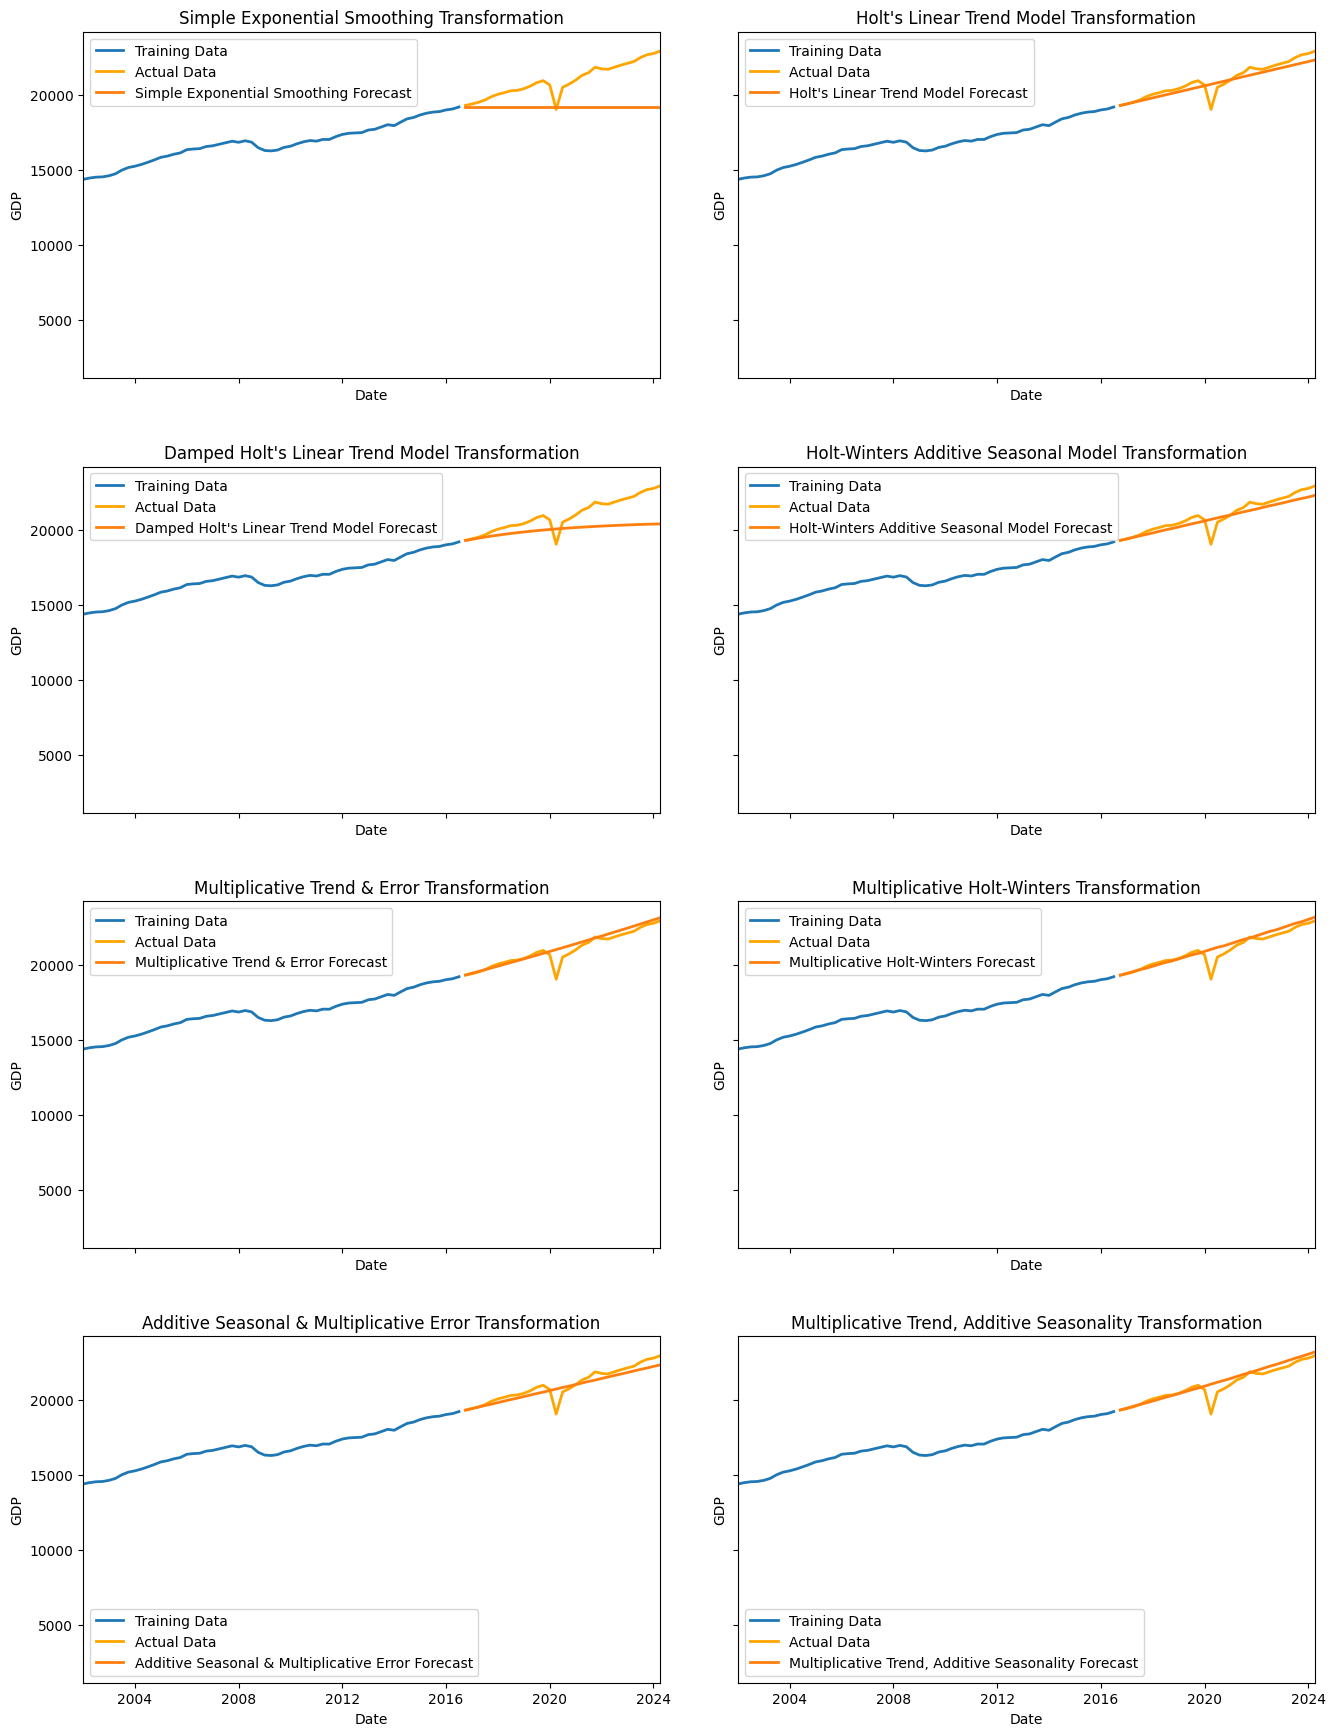

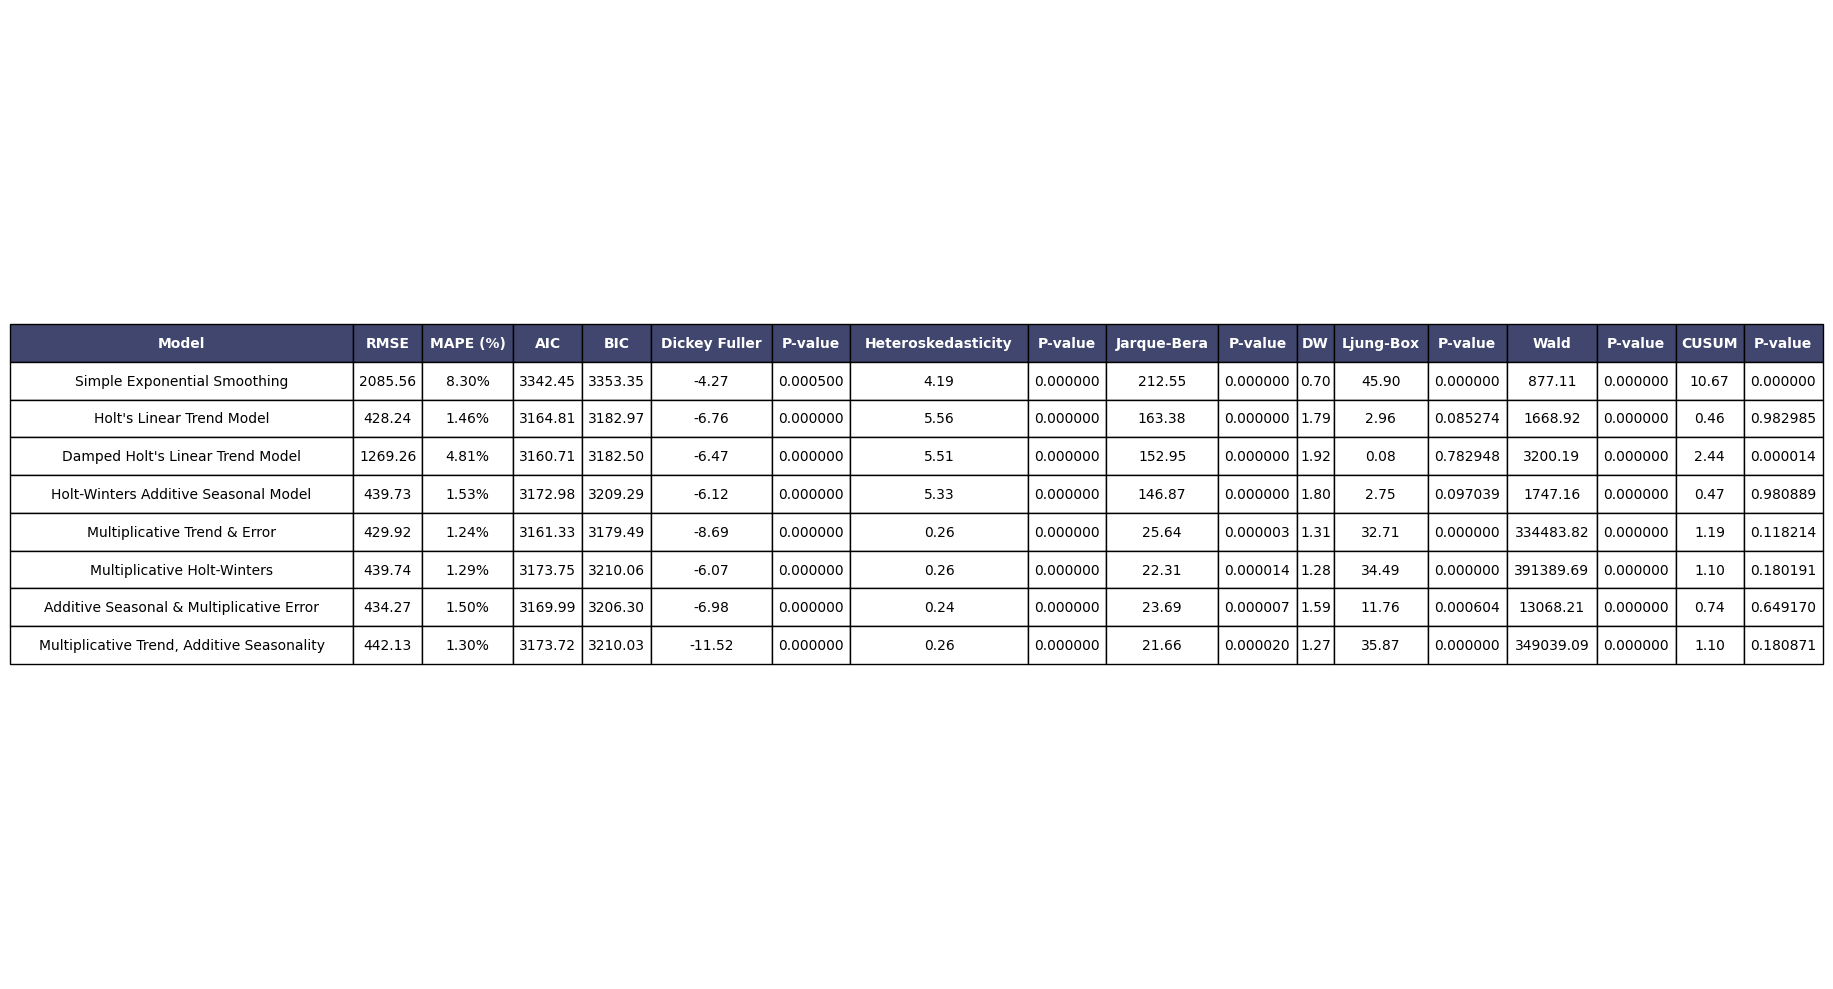

In [59]:
num_plots = len(forecast_list)
ncols = 2
nrows = (num_plots // ncols) + (num_plots % ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 18), sharex=True, sharey=True)
axes = axes.flatten()


for i, ((name, forecast), ax) in enumerate(zip(forecast_list, axes)):
    ax.plot(train['Revised Value'], label='Training Data', linewidth=2)
    ax.plot(test['Revised Value'], label='Actual Data', color='orange', linewidth=2)
    ax.plot(forecast, label=f'{name} Forecast', linewidth=2)
    ax.set_xlim(train.index[220], test.index[-1])
    ax.set_title(f'{name} Transformation')
    ax.set_xlabel('Date')
    ax.set_ylabel('GDP')
    ax.legend()

plt.tight_layout(pad=3.0)
model5plot_path = "model5_plot_output.png"
plt.savefig(model5plot_path)
plt.show()

table_data = []
for i in range(len(rmse_list)):
    name = f"{model_list[i][0]}"
    rmse = rmse_list[i][1]
    mape = mape_list[i][1] * 100 
    aic = aic_list[i][1]
    bic = bic_list[i][1]
    dickey_fuller_stat = dickey_fuller_list[i][1]
    dickey_fuller_pvalue = dickey_fuller_list[i][2]
    heteroskedasticity_stat = heteroskedasticity_list[i][1]
    heteroskedasticity_pvalue = heteroskedasticity_list[i][2]
    jb_stat = jarque_bera_list[i][1]
    jb_pvalue = jarque_bera_list[i][2]
    ljung_box_stat = ljung_box_list[i][1]
    ljung_box_pvalue = ljung_box_list[i][2]
    dw_statistic = dw_list[i][1]
    wald_stat = wald_list[i][1]
    wald_pvalue = wald_list[i][2]
    cusum_stat = cusum_list[i][1]
    cusum_pvalue = cusum_list[i][2]

    table_data.append([
        name, 
        f"{rmse:.2f}", 
        f"{mape:.2f}%", 
        f"{aic:.2f}", 
        f"{bic:.2f}", 
        f"{dickey_fuller_stat:.2f}", 
        f"{dickey_fuller_pvalue:.6f}", 
        f"{heteroskedasticity_stat:.2f}", 
        f"{heteroskedasticity_pvalue:.6f}",
        f"{jb_stat:.2f}", 
        f"{jb_pvalue:.6f}", 
        f"{dw_statistic:.2f}", 
        f"{ljung_box_stat:.2f}", 
        f"{ljung_box_pvalue:.6f}", 
        f"{wald_stat:.2f}", 
        f"{wald_pvalue:.6f}", 
        f"{cusum_stat:.2f}", 
        f"{cusum_pvalue:.6f}",
    ])


headers = [
    "Model", 
    "RMSE", 
    "MAPE (%)", 
    "AIC", 
    "BIC", 
    "Dickey Fuller", 
    "P-value", 
    "Heteroskedasticity", 
    "P-value", 
    "Jarque-Bera", 
    "P-value", 
    "DW", 
    "Ljung-Box", 
    "P-value", 
    "Wald", 
    "P-value", 
    "CUSUM", 
    "P-value",
]


fig, ax = plt.subplots(figsize=(18, 10)) 
ax.axis('off')

table = ax.table(cellText=table_data, colLabels=headers, cellLoc='center', loc='center')

table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]) 

table.auto_set_font_size(False)
table.set_fontsize(10) 
table.scale(1.8, 1.8) 

for (i, j), cell in table.get_celld().items():
    if i == 0: 
        cell.set_text_props(weight='bold', color='w')
        cell.set_facecolor("#40466e")
    else:
        cell.set_text_props(ha="center", va="center", wrap=True)

plt.tight_layout()

model5table_path = "model5_table_output.png"
plt.savefig(model5table_path, bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

# Model 5 Specification

Based on the above results and tests, the ETS model with a multiplicative error and trend performed the best.

### ETS Model: ETS(mult, mult, none)
- **Error = Multiplicative**: The error component is multiplicative, meaning the impact of errors scales with the level of GDP, making the effect proportional to GDP's current value.
- **Trend = Multiplicative**: The trend component is multiplicative, indicating that GDP's growth rate is proportional to its current level, resulting in larger absolute changes as GDP increases.
- **Seasonal = None**: The model does not include any seasonal components.

# Model 5 Performance
Performance improved a little bit in compared to HP Filter: ARIMA(3, 2, 2), Seasonal(2, 0, 2, 4) model
- RMSE (Root Mean Squared Error): Value of 429 down from 445
- MAPE (Mean Absolute Percentage Error): Value of 1.24% down from 1.57%
- AIC (Akaike Information Criterion): Absolute value of 3169 up signficantly from 202
- BIC (Bayesian Information Criterion): Absolute value of 3,179 up signaficantly from 238

### Tests:

- **Stationarity - Dickey-Fuller Test**:
  - **Purpose**: Measures whether the data is stationary and whether a unit root exists
  - **Results**: Significant p-value after differencing, rejecting the null hypothesis of non-stationarity
  - **Implication**: Data is now stationary and no longer contains a unit root
 
- **Constant Variance - Heteroskedasticity Test**:
  - **Purpose**: Measures whether heteroskedasticity exists in the residuals
  - **Results**: A significant p-value, indicating heteroskedasticity is present
  - **Implication**: Residuals have non-constant variance, indicating non-reliable coeffecient estimation
 
- **Normality - Jarque-Bera Test**:
  - **Purpose**: Measures whether the residuals are normally distributed
  - **Results**: High test statistic of 25 and a significant p-value, rejecting the null hypothesis of normality
  - **Implication**: Residuals are not normally distributed, suggesting the model has not captured all patterns in the data and violates the normality assumption

- **Autocorrelation - Ljung-Box Test**:
  - **Purpose**: Measures whether autocorrelation exists in the residuals
  - **Results**: Test statistic of 25 and a significant p-value, confirming significant autocorrelation in the residuals and rejecting the null hypothesis that the model residuals are independently distributed
  - **Implication**: The model has not captured all patterns in the data, indicating inadequacy

- **Autocorrelation - Durbin-Watson Test**:
  - **Purpose**: Value of 2 is no autocorrelation, below 2 is positive autocorrelation (a positive error is likely to be followed by another positive error) and above 2 is negative autocorrelation (a negative error is likely to be followed by another negative error)
  - **Results**: DW statistic of 1.31, indicating some positive autocorrelation in the residuals
  - **Implication**: The positive autocorrelation suggests that patterns in the data are not fully captured by the model

- **Linearity - Wald Test**:
  - **Purpose**: Tests the significance of the parameter(s) and whether the relationship in the model is linear (null hypothesis that the parameter(s) are equal to zero)
  - **Results**: The Wald statistic with a significant pvalue indicates that the parameters tested are statistically significant together. This suggests that the linear relationship in the model is strong.
  - **Implication**: The Wald test confirms that the model parameters are contributing meaningfully to the model, which supports the linearity assumption. The current model structure is likely appropriate

- **Structural Breakage - CUSUM Test**:
  - **Purpose**: Detects structural breaks or changes in the model parameters over time (null hypothesis that the parameters are stable)
    - **Results**: A CUSUM statistic of 1.19 with an insignificant p-value of 0.11 indicates that there is no significant structural break in the model. It would appear that the introduction of seasonality resolved structural issues in the residuals
    - **Implication**: The absence of significant structural breaks suggests that the relationship between the variables remains stable over time. The model likely performs consistently
 
### Forecast
Overall the model is an improvement upon the previous models as shown by the imporoved values. Regardless, the residuals present autocorrelation, heteroskedascticity and non-normality.

Although it is an improvement, performance is still most likely hindered due to:
- Inadequate Model Complexity: GDP is too complex of a variable for univariate ARIMA models or ETS models
- External Influences: Connected to the previous point, external variables are influencing GDP trends and results and addtional variables are currently not incorporated in the ARIMA model

What else can be done to improve the given ARIMA model? We can apply transformation and try other type of modeling methods
- Apply decomposition to the data and use the decomposed parts for ARIMA forecasting
- Apply LSTM (Long Short-Term Memory) model

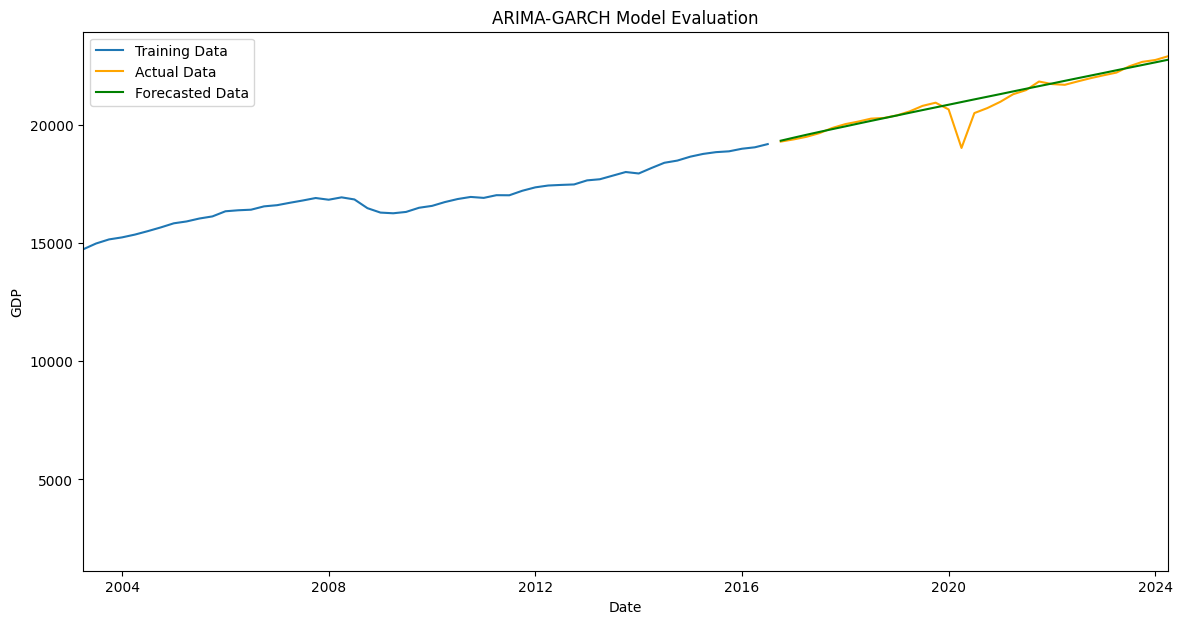

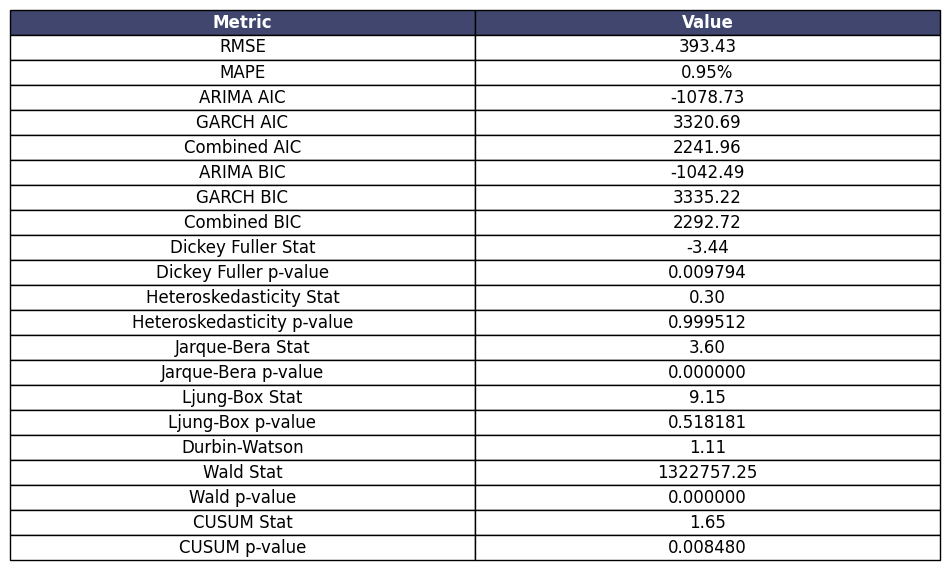

In [60]:
cycle, trend = sm.tsa.filters.hpfilter(train['Revised Value'], lamb=1600)

trend_model = pm.auto_arima(trend, seasonal=True, m=4, stepwise=True, suppress_warnings=True)
trend_forecast = trend_model.predict(n_periods=len(test))
trend_forecast_series = pd.Series(trend_forecast, index=test.index)

garch_model = arch_model(cycle, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")
garch_forecast = garch_fit.forecast(horizon=len(test))
garch_variance_forecast = np.sqrt(garch_forecast.variance.values[-1, :]) 

forecast = trend_forecast_series + garch_variance_forecast
residuals = test['Revised Value'] - forecast

adf_test = adfuller(residuals)
dickey_fuller_stat = adf_test[0]
dickey_fuller_pvalue = adf_test[1]

dw_statistic = durbin_watson(residuals)

ljung_box_test = acorr_ljungbox(residuals, lags=10)
ljung_box_stat = ljung_box_test['lb_stat'].values[-1]
ljung_box_pvalue = ljung_box_test['lb_pvalue'].values[-1]

jarque_bera_stat, jarque_bera_pvalue = normal_ad(residuals)

heteroskedasticity_test = het_arch(residuals)
heteroskedasticity_stat = heteroskedasticity_test[0]
heteroskedasticity_pvalue = heteroskedasticity_test[1] 

trend_model_sm = trend_model.arima_res_
params = trend_model_sm.params
r_matrix = np.eye(len(params))
wald_test_result = trend_model_sm.wald_test(r_matrix)
wald_statistic = wald_test_result.statistic.item() 
wald_pvalue = wald_test_result.pvalue
cusum_test = breaks_cusumolsresid(residuals)
cusum_test_stat = cusum_test[0] 
cusum_test_pvalue = cusum_test[1] 

plt.figure(figsize=(14,7))
plt.plot(train['Revised Value'], label='Training Data')
plt.plot(test['Revised Value'], label='Actual Data', color='orange')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.xlim(train.index[225], test.index[-1])
plt.title('ARIMA-GARCH Model Evaluation')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
model6plot_path = "model6_plot_output.png"
plt.savefig(model6plot_path)
plt.show()

arima_aic = trend_model.aic()
arima_bic = trend_model.bic()
garch_aic = garch_fit.aic
garch_bic = garch_fit.bic
combined_aic = arima_aic + garch_aic
combined_bic = arima_bic + garch_bic
rmse = np.sqrt(np.mean((test['Revised Value'] - forecast) ** 2))
mape = np.mean(np.abs((test['Revised Value'] - forecast) / test['Revised Value']))

data = [
    ["Metric", "Value"],
    ["RMSE", f"{rmse:.2f}"],
    ["MAPE", f"{mape:.2%}"],
    ["ARIMA AIC", f"{arima_aic:.2f}"],
    ["GARCH AIC", f"{garch_aic:.2f}"],
    ["Combined AIC", f"{combined_aic:.2f}"],
    ["ARIMA BIC", f"{arima_bic:.2f}"],
    ["GARCH BIC", f"{garch_bic:.2f}"],
    ["Combined BIC", f"{combined_bic:.2f}"],
    ["Dickey Fuller Stat", f"{dickey_fuller_stat:.2f}"],
    ["Dickey Fuller p-value", f"{dickey_fuller_pvalue:.6f}"],
    ["Heteroskedasticity Stat", f"{heteroskedasticity_stat:.2f}"],
    ["Heteroskedasticity p-value", f"{heteroskedasticity_pvalue:.6f}"],
    ["Jarque-Bera Stat", f"{jarque_bera_stat:.2f}"],
    ["Jarque-Bera p-value", f"{jarque_bera_pvalue:.6f}"],
    ["Ljung-Box Stat", f"{ljung_box_stat:.2f}"],
    ["Ljung-Box p-value", f"{ljung_box_pvalue:.6f}"],
    ["Durbin-Watson", f"{dw_statistic:.2f}"],
    ["Wald Stat", f"{wald_statistic:.2f}"],
    ["Wald p-value", f"{wald_pvalue:.6f}"],
    ["CUSUM Stat", f"{cusum_test_stat:.2f}"],
    ["CUSUM p-value", f"{cusum_test_pvalue:.6f}"]
]

title = f"Diagnostic Results for {model_fit}"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

table = ax.table(cellText=data, colLabels=None, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5) 

table[0, 0].set_facecolor("#40466e")
table[0, 1].set_facecolor("#40466e")
table[0, 0].set_text_props(color="w", weight="bold")
table[0, 1].set_text_props(color="w", weight="bold")

model6table_path = "model6_table_output.png"
plt.savefig(model6table_path, bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

# Model Performance
The approach of breaking apart the time series data into its individual components and modeling them with models better fit for the individual components proves to be very successful.

Combining the HP filter, ARIMA, and GARCH models, provides a comprehensive forecast of the time series reducing MAPE to sub <1%:

- The **HP filter** separates the series into its long-term trend and short-term cyclical components.
- **ARIMA** models the trend, capturing the overall direction of the series.
- **GARCH** captures the volatility in the cyclical component.

This effectively captures both long-term trends and short-term volatility, providing a more accurate and nuanced forecast.

## Step 1: Decomposing the Time Series with the HP Filter

The first step in this process involves using the **Hodrick-Prescott (HP) filter** to decompose the original time series into two components: a **trend component** and a **cyclical component**.

- **Trend Component $\tau_t$**: This represents the smooth, long-term progression of the series, capturing structural changes such as technological advancements or demographic shifts. The trend is generally stable and does not exhibit significant fluctuations or volatility clustering.

- **Cyclical Component $c_t$**: This captures short-term fluctuations around the trend, which are often more volatile and subject to economic cycles like recessions or booms. These cycles are where you would typically see periods of high or low volatility.

The HP filter separates these two components using the following formula:

$$
y_t = \tau_t + c_t
$$

Where:
- $ y_t $ is the original time series (e.g., GDP).
- $ \tau_t $ is the trend component.
- $ c_t $ is the cyclical component.

The HP filter minimizes the following objective function to extract the trend component $ \tau_t $:

$$
\min_{\tau_t} \left( \sum_{t=1}^{T} (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} \left[ (\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1}) \right]^2 \right)
$$

- The first term $ \sum_{t=1}^{T} (y_t - \tau_t)^2 $ measures the fit of the trend $ \tau_t $ to the actual data $ y_t $.
- The second term $ \lambda \sum_{t=2}^{T-1} \left[ (\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1}) \right]^2 $ penalizes the changes in the slope of the trend, making $ \tau_t $ smooth.
- $ \lambda $ is a smoothing parameter, commonly set to 1600 for quarterly data.

### Step 2: Modeling the Trend Component with ARIMA

Once the trend component $ \tau_t $ has been isolated using the HP filter, the next step is to model this trend using an **ARIMA (Autoregressive Integrated Moving Average)** model.

- **Purpose of ARIMA**: The ARIMA model is used to forecast the future values of the trend component

- **ARIMA Model Equation**:

$$
\tau_t = \mu + \sum_{i=1}^{p} \phi_i \tau_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \epsilon_t
$$

Where:
- $\tau_t$ is the trend component being modeled
- $ \mu $ is the mean of the series
- $ \phi_i $ are the coefficients for the autoregressive (AR) terms
- $ \theta_j $ are the coefficients for the moving average (MA) terms
- $ \epsilon_t $ is the white noise error term

- **Trend Forecast**: The ARIMA model produces a forecast of the trend component over the specified period, which represents the expected long-term progression of the time series.

### Step 3: Modeling the Cyclical Component with GARCH

With the trend component modeled, attention turns to the cyclical component $ c_t $. The cyclical component often exhibits **volatility clustering**—a phenomenon where periods of high volatility are followed by high volatility, and periods of low volatility are followed by low volatility. This results in the autocorrelation and heteroskedasticity issues we experienced earlier. These autocorrelation issues suggested positive (negative) errors were likely to be followed by additional positive (negative) errors. In this case, we can predict future errors (volatility)

- **Volatility in Cyclical Component**: Economic cycles and external shocks (like financial crises) tend to affect the cyclical component, leading to periods of increased volatility. During these times, GDP, for example, may fluctuate more significantly than during stable periods.

- **GARCH Model**: The **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)** model is particularly well-suited for modeling this kind of volatility. The GARCH model forecasts the time-varying variance (volatility) of the cyclical component.

#### **GARCH Model Equation**

The GARCH(1,1) model estimates the conditional variance $ \sigma_t^2 $ of the residuals $ \epsilon_t $ from the ARIMA model:

$$
\epsilon_t = \sigma_t z_t
$$

Where:
- $ \epsilon_t $ is the error term from the ARIMA model, capturing the cyclical component.
- $ \sigma_t^2 $ is the conditional variance (volatility) at time $ t $.
- $ z_t $ is a white noise process, typically assumed to follow a standard normal distribution.

The conditional variance $ \sigma_t^2 $ is modeled as:

$$
\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$

Where:
- $ \alpha_0 $ is the constant term.
- $ \alpha_1 $ is the coefficient for the ARCH term (past squared residuals).
- $ \beta_1 $ is the coefficient for the GARCH term (past conditional variances).

#### **Interpretation of the GARCH Equation**

- **$ \alpha_1 \epsilon_{t-1}^2 $**: This term accounts for the impact of previous shocks on current volatility. A large $ \alpha_1 $ value indicates that past shocks have a significant impact on current volatility.
- **$ \beta_1 \sigma_{t-1}^2 $**: This term captures the persistence of volatility over time. A large $ \beta_1 $ value suggests that volatility tends to persist for multiple periods after a shock.

### Step 4: Combining ARIMA and GARCH Forecasts

The final forecast for the time series is obtained by combining the ARIMA forecast of the trend component with the GARCH forecast of the cyclical component’s volatility.

$$
\text{Forecast}_t = \text{Trend Forecast}_t + \text{Volatility Forecast}_t
$$

- **Why Combine?**: The trend component gives the overall direction in which the time series is moving, while the cyclical component, influenced by short-term economic fluctuations, adds the volatility around this trend. By combining these two forecasts, the model captures both the long-term progression and the short-term volatility.

### Step 5: Evaluating the Combined Forecast

To evaluate the accuracy of the combined forecast, several metrics are calculated:

- **RMSE (Root Mean Squared Error)**: This metric measures the average magnitude of the forecast errors, providing a sense of how closely the model's forecasts match the actual data.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{t=1}^{n} (\hat{y}_t - y_t)^2}
$$

Where:
- $ \hat{y}_t $ is the forecasted value.
- $ y_t $ is the actual value.
- $ n $ is the number of observations.

- **MAPE (Mean Absolute Percentage Error)**: This metric gives the average percentage error between the actual and forecasted values, allowing for comparison across different scales.

$$
\text{MAPE} = \frac{1}{n} \sum_{t=1}^{n} \left| \frac{y_t - \hat{y}_t}{y_t} \right| \times 100
$$

- **Residual Analysis**: The residuals (the difference between actual and forecasted values) are analyzed using the **Durbin-Watson statistic**, which measures autocorrelation in the residuals. A value close to 2 indicates little to no autocorrelation, suggesting that the model has adequately captured the patterns in the data.

### Forecast
Overall the previous model had the best MAPE performance out of all. However, similar problems related to previous model persist.

Although it is an improvement, performance is still most likely hindered due to:
- Inadequate Model Complexity: GDP is too complex of a variable for univariate ARIMA models or ETS models
- External Influences: Connected to the previous point, external variables are influencing GDP trends and results and addtional variables are currently not incorporated in the ARIMA model

Lastly, we can briefly explore another model application known as Long Short-Term Memory (LSTM) which is a more recently developed forecasting model in comparison to ARIMA, ETS or GARCH models. LSTM models belong to the family of Recurrent Neural Networks (RNNs) and are specifically designed to handle sequences of data, making them well-suited for forecasting.

LSTMs can be powerful because they can capture both short-term and long-term dependencies/relationships within the data. Unlike traditional models like ARIMA, which are generally linear and rely on lagged observations, LSTMs can learn complex, non-linear relationships directly from the data.

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [62]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train['Revised Value'].values.reshape(-1, 1))
test_scaled = scaler.transform(test['Revised Value'].values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 4 
X_train, y_train = create_sequences(train_scaled, sequence_length)
X_test, y_test = create_sequences(test_scaled, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [63]:
def build_lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()

    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    return model

units = 64
dropout_rate = 0.3
learning_rate = 0.001
model = build_lstm_model(units, dropout_rate, learning_rate)

In [64]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2041 - val_loss: 0.5811
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0729 - val_loss: 0.0282
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - val_loss: 0.0072
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - val_loss: 0.0583
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - val_loss: 0.0031
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0015
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 9.3342e-04
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - val_loss: 0.0090
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - val_loss: 0.0089
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - val_loss: 9.9706e-04
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


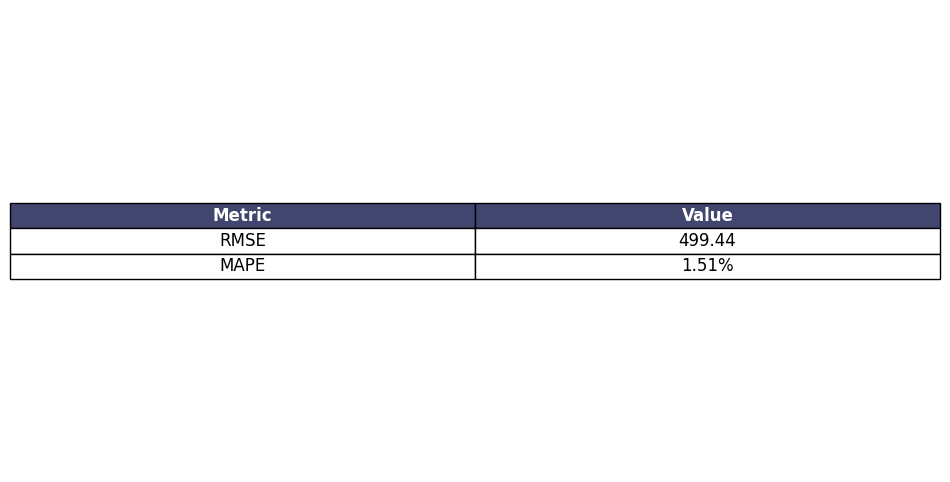

In [65]:
lstm_predictions = model.predict(X_test)

lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse_lstm = np.sqrt(mean_squared_error(y_test_original, lstm_predictions))
mape_lstm = mean_absolute_percentage_error(y_test_original, lstm_predictions) * 100
data = [
    ["Metric", "Value"],
    ["RMSE", f"{rmse_lstm:.2f}"],
    ["MAPE", f"{mape_lstm:.2f}%"],
]

title = f"Diagnostic Results for LSTM"

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

table = ax.table(cellText=data, colLabels=None, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5) 

table[0, 0].set_facecolor("#40466e")
table[0, 1].set_facecolor("#40466e")
table[0, 0].set_text_props(color="w", weight="bold")
table[0, 1].set_text_props(color="w", weight="bold")

model7table_path = "model7_table_output.png"
plt.savefig(model7table_path, bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

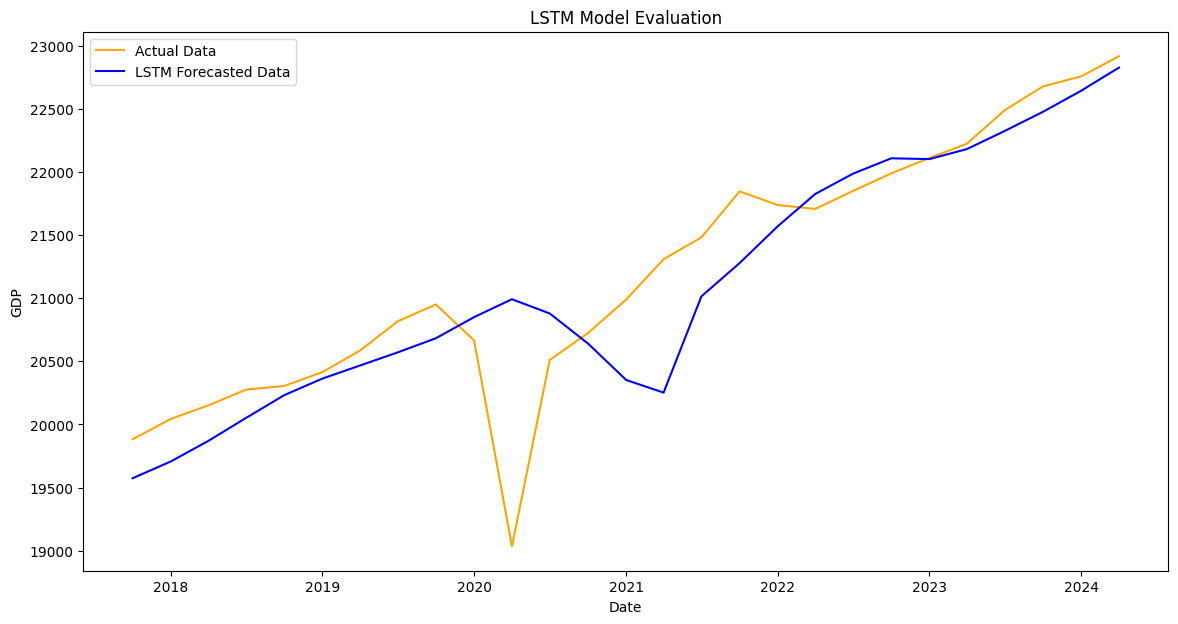

In [66]:
plt.figure(figsize=(14, 7))
plt.plot(test.index[sequence_length:], y_test_original, label='Actual Data', color='orange')
plt.plot(test.index[sequence_length:], lstm_predictions, label='LSTM Forecasted Data', color='blue')
plt.title('LSTM Model Evaluation')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()

model6plot_path = "model6_plot_output.png"
plt.savefig(model6plot_path)


## How LSTM Models Work
LSTM models contain special units called memory cells, which maintain and update an internal state over time. These cells are controlled by three gates:

- Input Gate: Decides how much of the new information to keep
- Forget Gate: Decides how much of the past information to discard
- Output Gate: Decides what part of the cell's state should be output as the prediction for the next time step

These gates allow the LSTM model to selectively retain or discard information, making it highly effective at capturing patterns over various time horizons

## Application of LSTM to Time Series Forecasting
When applied to time series forecasting, LSTMs can process and learn from sequences of past observations to predict future values. This makes them a flexible choice for capturing complex patterns that may involve both the long-term trends and short-term fluctuations that were separately modeled by ARIMA and GARCH in the previous sections

Incorporating external variables, like macroeconomic indicators or financial metrics, into the LSTM model can further enhance its forecasting capability. LSTM models can seamlessly integrate multiple inputs and learn their interdependencies, potentially providing a more accurate and holistic forecast than traditional methods

## Moving Forward
Future progressions of forecasting GDP will most likely be more successfull and accurate when improving upon traditional ARIMA & GARCH models with the addition of additional exogenous variables such as lagging, coinciding & leading economic indicators as well as incorporating methods such as LSTM that capture non-linear relationships